#Video Link

https://cometmail-my.sharepoint.com/:v:/g/personal/sxt230143_utdallas_edu/ET59seCL92BOt2BqzdGuDeUByx-YU74lqZElqpv5t-amOg?nav=eyJyZWZlcnJhbEluZm8iOnsicmVmZXJyYWxBcHAiOiJPbmVEcml2ZUZvckJ1c2luZXNzIiwicmVmZXJyYWxBcHBQbGF0Zm9ybSI6IldlYiIsInJlZmVycmFsTW9kZSI6InZpZXciLCJyZWZlcnJhbFZpZXciOiJNeUZpbGVzTGlua0NvcHkifX0&e=l8IEOA


# Data Analysis

## Get Dataset

In [ ]:
import kagglehub
import os
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

path = kagglehub.dataset_download("mrmorj/hate-speech-and-offensive-language-dataset")

print("Path to dataset files:", path)
print(os.listdir(path))

100%|██████████| 1.01M/1.01M [00:00<00:00, 23.3MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/mrmorj/hate-speech-and-offensive-language-dataset/versions/1
['labeled_data.csv']


I found it interesting becuase its very difficult to differentiate between hate speech
and offensive speech
It was a perfect dataset to test all the classification models we learnt throughot the course
It was a perfect start to get some insights on my next course interest that is machine learning
In class we saw a lot of numerical datasets, so i wanted to go beyond and learn how categorical data is processed, handled and fit

## Load Dataset

In [ ]:
data = pd.read_csv(os.path.join(path, 'labeled_data.csv'), on_bad_lines='warn')

## Understand the dataset

In [ ]:
print(data.head())

   Unnamed: 0  count  hate_speech  offensive_language  neither  class  \
0           0      3            0                   0        3      2   
1           1      3            0                   3        0      1   
2           2      3            0                   3        0      1   
3           3      3            0                   2        1      1   
4           4      6            0                   6        0      1   

                                               tweet  
0  !!! RT @mayasolovely: As a woman you shouldn't...  
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...  
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...  
3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...  
4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...  


In [ ]:
print("Number of samples:", len(data))

Number of samples: 24783


In [ ]:
data.shape

(24783, 7)

In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          24783 non-null  int64 
 1   count               24783 non-null  int64 
 2   hate_speech         24783 non-null  int64 
 3   offensive_language  24783 non-null  int64 
 4   neither             24783 non-null  int64 
 5   class               24783 non-null  int64 
 6   tweet               24783 non-null  object
dtypes: int64(6), object(1)
memory usage: 1.3+ MB
None


In [ ]:
print(data.isnull().sum())

Unnamed: 0            0
count                 0
hate_speech           0
offensive_language    0
neither               0
class                 0
tweet                 0
dtype: int64


In [ ]:
data = data.drop_duplicates()
data.shape

(24783, 7)

Drop the redundant index column

In [ ]:
data.drop(columns=['Unnamed: 0'], inplace=True)

In [ ]:
print(data.describe())

              count   hate_speech  offensive_language       neither  \
count  24783.000000  24783.000000        24783.000000  24783.000000   
mean       3.243473      0.280515            2.413711      0.549247   
std        0.883060      0.631851            1.399459      1.113299   
min        3.000000      0.000000            0.000000      0.000000   
25%        3.000000      0.000000            2.000000      0.000000   
50%        3.000000      0.000000            3.000000      0.000000   
75%        3.000000      0.000000            3.000000      0.000000   
max        9.000000      7.000000            9.000000      9.000000   

              class  
count  24783.000000  
mean       1.110277  
std        0.462089  
min        0.000000  
25%        1.000000  
50%        1.000000  
75%        1.000000  
max        2.000000  


In [ ]:
print(data['class'].value_counts())

class
1    19190
2     4163
0     1430
Name: count, dtype: int64


Class 0 - hate speech

Class 1 - offensive language

Class 2 - neither

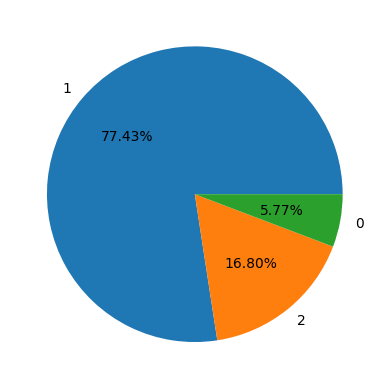

In [ ]:
plt.pie(data['class'].value_counts().values,
        labels=data['class'].value_counts().index,
        autopct='%1.2f%%')
plt.show()

Observation from above:
*   There are three classes
*   Data is imbalanced



### Further Data Analysis:

In [ ]:
# Identify tweets with high counts of hate speech, offensive language, or neutral votes
high_hate_speech = data[data['hate_speech'] > 5]
high_offensive_language = data[data['offensive_language'] > 5]
high_neutral = data[data['neither'] > 5]

print("Tweets with high hate speech counts:", len(high_hate_speech))
print(high_hate_speech['tweet'])

print("\nTweets with high offensive language counts:", len(high_offensive_language))
print(high_offensive_language['tweet'])

print("\nTweets with high neutral counts:", len(high_neutral))
print(high_neutral['tweet'])

Tweets with high hate speech counts: 8
3404     @Hovaa_ ya I know all the slang I'm racist I h...
3869       @L1LTR4P fucking losers wetbacks #SorryNotSorry
6171     @infidelpamelaLC I'm going to blame the black ...
6378     @kcSnowWhite7 @SamSaunders42 don't forget napp...
10451                                   I hate fat bitches
15658    RT @Isa__Lopez: @D_Lo520 but you're still a fa...
15809    RT @JihadistJoe: We Muslims have no military h...
19136    RT @iBeZo: Stupid fucking nigger LeBron. You f...
Name: tweet, dtype: object

Tweets with high offensive language counts: 993
4        !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
80       "@BestProAdvice: The facts on tattoos...tattoo...
127      "@GTM_Al: Ya side bitch gotta know it's rules ...
133      "@Gizzy_Jones94: If she kiss u with her eyes o...
137      "@HBMostDope: Ugly bitches be like I'm my own ...
                               ...                        
24673    when im there with a ghetto ass accent being s...


#### Common Words in each class

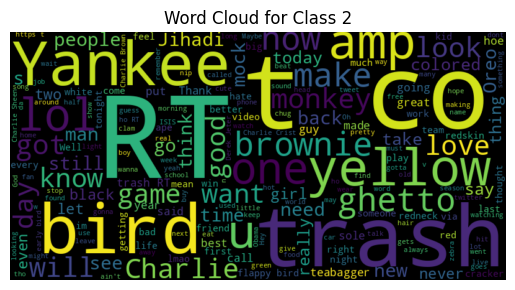

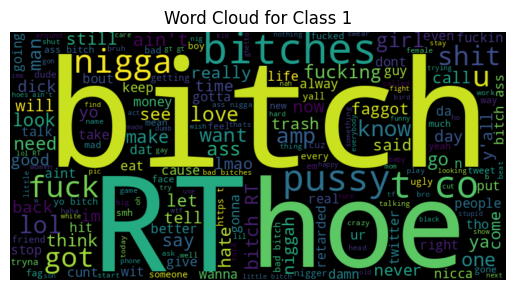

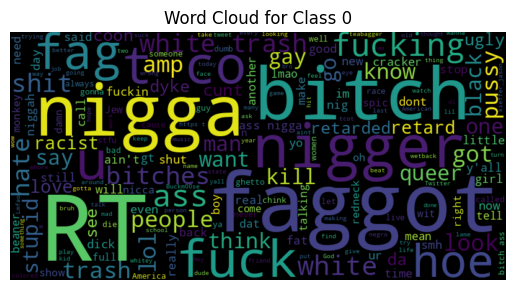

In [ ]:
from wordcloud import WordCloud

# Generate word clouds for each class
for class_label in data['class'].unique():
    class_data = data[data['class'] == class_label]['tweet']
    text = " ".join(class_data)
    wordcloud = WordCloud(width=800, height=400).generate(text)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Word Cloud for Class {class_label}")
    plt.show()

## Text Preprocessing

### Lowercasing: Converting all text to lowercase for consistency.

In [ ]:
data['tweet'] = data['tweet'].str.lower()

### Handling Contractions

contractions are very common in tweets and hence needs to be handled. I am handling them before removing punctuations and special characters because after removing punctuations and special characters we will not be able to identify contractions and they'll be turned into meaning less words

In [ ]:
!pip install contractions

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 10.2 MB/s eta 0:00:00


In [ ]:
import contractions

def handle_contractions(text):
  text = contractions.fix(text)
  return text

data['tweet']= data['tweet'].apply(lambda x: handle_contractions(x))
data.head()

count  hate_speech  offensive_language  neither  class  \
0      3            0                   0        3      2   
1      3            0                   3        0      1   
2      3            0                   3        0      1   
3      3            0                   2        1      1   
4      6            0                   6        0      1   

                                               tweet  
0  !!! rt @mayasolovely: as a woman you should no...  
1  !!!!! rt @mleew17: boy dats cold...tyga dwn ba...  
2  !!!!!!! rt @urkindofbrand dawg!!!! rt @80sbaby...  
3  !!!!!!!!! rt @c_g_anderson: @viva_based she lo...  
4  !!!!!!!!!!!!! rt @shenikaroberts: the shit you...

### Removing Noise

#### Remove HTML tags

In [ ]:
from bs4 import BeautifulSoup

def remove_html_tags(text):
  text = BeautifulSoup(text, "html.parser").get_text()
  return text

data['tweet'] = data['tweet'].apply(lambda x: remove_html_tags(x))
data.head()

<ipython-input-18-00e9ed824d87>:4: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, "html.parser").get_text()


count  hate_speech  offensive_language  neither  class  \
0      3            0                   0        3      2   
1      3            0                   3        0      1   
2      3            0                   3        0      1   
3      3            0                   2        1      1   
4      6            0                   6        0      1   

                                               tweet  
0  !!! rt @mayasolovely: as a woman you should no...  
1  !!!!! rt @mleew17: boy dats cold...tyga dwn ba...  
2  !!!!!!! rt @urkindofbrand dawg!!!! rt @80sbaby...  
3  !!!!!!!!! rt @c_g_anderson: @viva_based she lo...  
4  !!!!!!!!!!!!! rt @shenikaroberts: the shit you...

Initially i thought i should remove username as it is not part of the actual tweet, making it irrelevant. But some usernames can contain offensive words for example: ""@BitchJones92: Get worshiping bitch! http://t.co/R37CejCjou" woof woof"
so that is also considered here

#### Remove URLs

In [ ]:
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    text = url_pattern.sub(r'', text)
    return text

data['tweet'] = data['tweet'].apply(lambda x: remove_html_tags(x))
data.head()

<ipython-input-18-00e9ed824d87>:4: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, "html.parser").get_text()


count  hate_speech  offensive_language  neither  class  \
0      3            0                   0        3      2   
1      3            0                   3        0      1   
2      3            0                   3        0      1   
3      3            0                   2        1      1   
4      6            0                   6        0      1   

                                               tweet  
0  !!! rt @mayasolovely: as a woman you should no...  
1  !!!!! rt @mleew17: boy dats cold...tyga dwn ba...  
2  !!!!!!! rt @urkindofbrand dawg!!!! rt @80sbaby...  
3  !!!!!!!!! rt @c_g_anderson: @viva_based she lo...  
4  !!!!!!!!!!!!! rt @shenikaroberts: the shit you...

#### Remove Emojis

Emojis are very common in tweets and are noise hence we remove them

In [ ]:
!pip install emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.9/586.9 kB 7.1 MB/s eta 0:00:00


In [ ]:
import emoji

def remove_emojis(text):
  text = emoji.demojize(text)
  return text

data['tweet'] = data['tweet'].apply(lambda x: remove_emojis(x))
data.head()

count  hate_speech  offensive_language  neither  class  \
0      3            0                   0        3      2   
1      3            0                   3        0      1   
2      3            0                   3        0      1   
3      3            0                   2        1      1   
4      6            0                   6        0      1   

                                               tweet  
0  !!! rt @mayasolovely: as a woman you should no...  
1  !!!!! rt @mleew17: boy dats cold...tyga dwn ba...  
2  !!!!!!! rt @urkindofbrand dawg!!!! rt @80sbaby...  
3  !!!!!!!!! rt @c_g_anderson: @viva_based she lo...  
4  !!!!!!!!!!!!! rt @shenikaroberts: the shit you...

#### Eliminating punctuation

In [ ]:
import string

punctuations_list = string.punctuation
def remove_punctuations(text):
    for punctuation in string.punctuation:
      text = text.replace(punctuation, '')
    return text


data['tweet']= data['tweet'].apply(lambda x: remove_punctuations(x))
data.head()

count  hate_speech  offensive_language  neither  class  \
0      3            0                   0        3      2   
1      3            0                   3        0      1   
2      3            0                   3        0      1   
3      3            0                   2        1      1   
4      6            0                   6        0      1   

                                               tweet  
0   rt mayasolovely as a woman you should not com...  
1   rt mleew17 boy dats coldtyga dwn bad for cuff...  
2   rt urkindofbrand dawg rt 80sbaby4life you eve...  
3     rt cganderson vivabased she look like a tranny  
4   rt shenikaroberts the shit you hear about me ...

#### Eliminating special characters

In [ ]:
import re

def remove_special_char(text):
    text = re.sub(r'\W', ' ', text)
    return text

data['tweet'] = data['tweet'].apply(lambda x: remove_special_char(x))
data.head()

count  hate_speech  offensive_language  neither  class  \
0      3            0                   0        3      2   
1      3            0                   3        0      1   
2      3            0                   3        0      1   
3      3            0                   2        1      1   
4      6            0                   6        0      1   

                                               tweet  
0   rt mayasolovely as a woman you should not com...  
1   rt mleew17 boy dats coldtyga dwn bad for cuff...  
2   rt urkindofbrand dawg rt 80sbaby4life you eve...  
3     rt cganderson vivabased she look like a tranny  
4   rt shenikaroberts the shit you hear about me ...

#### Remove numbers

In [ ]:
def remove_num(text):
    text = re.sub(r'\d+', '', text)
    return text

data['tweet'] = data['tweet'].apply(lambda x: remove_num(x))
data.head()

count  hate_speech  offensive_language  neither  class  \
0      3            0                   0        3      2   
1      3            0                   3        0      1   
2      3            0                   3        0      1   
3      3            0                   2        1      1   
4      6            0                   6        0      1   

                                               tweet  
0   rt mayasolovely as a woman you should not com...  
1   rt mleew boy dats coldtyga dwn bad for cuffin...  
2   rt urkindofbrand dawg rt sbabylife you ever f...  
3     rt cganderson vivabased she look like a tranny  
4   rt shenikaroberts the shit you hear about me ...

#### Stop Word Removal

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    text = ' '.join(word for word in text.split() if word not in stop_words)
    return text

data['tweet'] = data['tweet'].apply(lambda x: remove_stopwords(x))
data.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


count  hate_speech  offensive_language  neither  class  \
0      3            0                   0        3      2   
1      3            0                   3        0      1   
2      3            0                   3        0      1   
3      3            0                   2        1      1   
4      6            0                   6        0      1   

                                               tweet  
0  rt mayasolovely woman complain cleaning house ...  
1  rt mleew boy dats coldtyga dwn bad cuffin dat ...  
2  rt urkindofbrand dawg rt sbabylife ever fuck b...  
3           rt cganderson vivabased look like tranny  
4  rt shenikaroberts shit hear might true might f...

### Lemmatization

In [ ]:
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()

def lemmatize_words(text):
  text = ' '.join(lemmatizer.lemmatize(word) for word in text.split())
  return text

data['tweet'] = data['tweet'].apply(lambda x: lemmatize_words(x))
data.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...


count  hate_speech  offensive_language  neither  class  \
0      3            0                   0        3      2   
1      3            0                   3        0      1   
2      3            0                   3        0      1   
3      3            0                   2        1      1   
4      6            0                   6        0      1   

                                               tweet  
0  rt mayasolovely woman complain cleaning house ...  
1  rt mleew boy dat coldtyga dwn bad cuffin dat h...  
2  rt urkindofbrand dawg rt sbabylife ever fuck b...  
3           rt cganderson vivabased look like tranny  
4  rt shenikaroberts shit hear might true might f...

Removing Numbers: If numbers are irrelevant to the task.
Handling Missing Values: Filling or removing incomplete data.
Text Normalization: Expanding contractions or correcting misspellings.
Encoding: Converting text to numerical formats like Bag of Words, TF-IDF, or embeddings.

# Helper functions

Plot heatmap

In [ ]:
def plot_heatmap(y_test, y_pred):
    report_dict = classification_report(y_test, y_pred, output_dict=True)
    report_df = pd.DataFrame(report_dict).transpose()
    report_df = report_df.iloc[:-3, :-1]

    plt.figure(figsize=(5, 4))
    sns.heatmap(report_df, annot=True, cmap="Blues", fmt=".2f")
    plt.title("Classification Report Heatmap")
    plt.show()

# RANDOM FOREST CLASSIFIER

### Balancing Data and TFIDF

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
def random_forest_classifier(X_train, X_test, y_train, y_test):
    # Initialize the Random Forest classifier
    rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

    # Train the classifier
    rf_classifier.fit(X_train, y_train)

    # Predict
    y_pred = rf_classifier.predict(X_test)

    # Evaluate the model
    print("Accuracy:", "%.2f" % (accuracy_score(y_test, y_pred) * 100))
    print("Classification Report:\n", classification_report(y_test, y_pred))

    plot_heatmap(y_test, y_pred)

In [ ]:
# Split the data into features and target
X = data['tweet']
y = data['class']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Convert text data into numerical format using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english', ngram_range=(1, 2))
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

####Approach 1: SMOTE

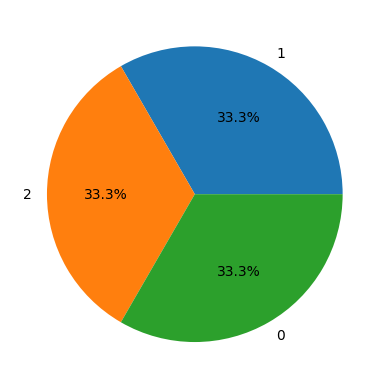

In [ ]:
# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_tfidf, y_train)

# Visualize the class distribution after resampling
balanced_class_counts = pd.Series(y_train_smote).value_counts()
plt.pie(balanced_class_counts.values,
        labels=balanced_class_counts.index,
        autopct='%1.1f%%')
plt.show()

Accuracy: 87.73
Classification Report:
               precision    recall  f1-score   support

           0       0.37      0.40      0.39       286
           1       0.95      0.91      0.93      3838
           2       0.78      0.91      0.84       833

    accuracy                           0.88      4957
   macro avg       0.70      0.74      0.72      4957
weighted avg       0.88      0.88      0.88      4957



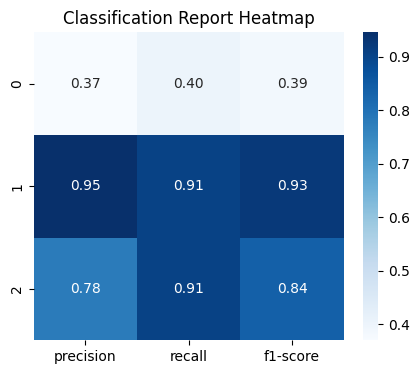

In [ ]:
random_forest_classifier(X_train_smote, X_test_tfidf, y_train_smote, y_test)

####Approach 2: Combination of Random Over Sampling and Random Under Sampling

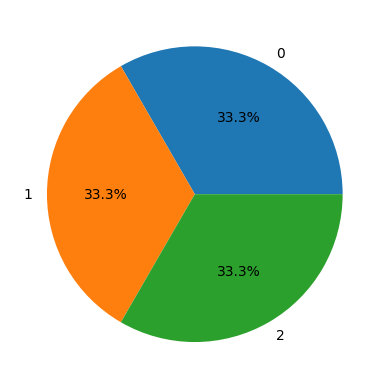

In [ ]:
# Apply RandomOverSampler for oversampling
ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros = ros.fit_resample(X_train_tfidf, y_train)

# Apply RandomUnderSampler to reduce the majority class
rus = RandomUnderSampler(random_state=42)
X_train_ros_rus, y_train_ros_rus = rus.fit_resample(X_train_ros, y_train_ros)

# Visualize the class distribution after resampling
balanced_class_counts = pd.Series(y_train_ros_rus).value_counts()
plt.pie(balanced_class_counts.values,
        labels=balanced_class_counts.index,
        autopct='%1.1f%%')
plt.show()

Accuracy: 89.13
Classification Report:
               precision    recall  f1-score   support

           0       0.48      0.36      0.41       286
           1       0.95      0.92      0.93      3838
           2       0.77      0.93      0.84       833

    accuracy                           0.89      4957
   macro avg       0.73      0.74      0.73      4957
weighted avg       0.89      0.89      0.89      4957



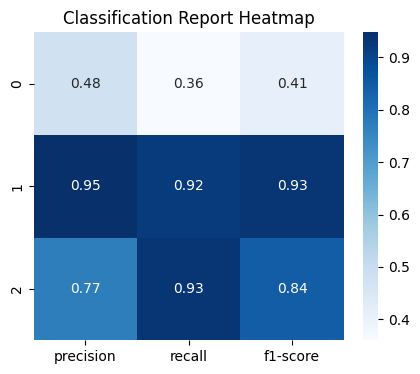

In [ ]:
random_forest_classifier(X_train_ros_rus, X_test_tfidf, y_train_ros_rus, y_test)

#### Approach 3: Manual Resampling

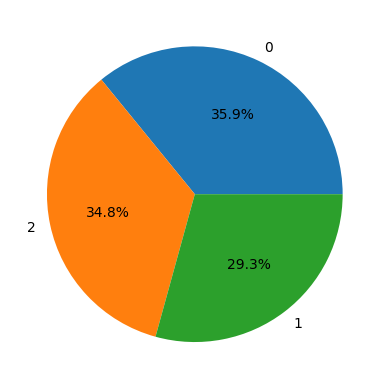

In [ ]:
class_2 = data[data['class'] == 2]
class_1 = data[data['class'] == 1].sample(n=3500)
class_0 = data[data['class'] == 0]

balanced_data = pd.concat([class_0, class_0, class_0, class_1, class_2], axis=0)

# Visualize the class distribution after resampling
plt.pie(balanced_data['class'].value_counts().values,
        labels=balanced_data['class'].value_counts().index,
        autopct='%1.1f%%')
plt.show()

Accuracy: 92.22
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.98      0.94       858
           1       0.95      0.81      0.87       700
           2       0.92      0.96      0.94       833

    accuracy                           0.92      2391
   macro avg       0.93      0.92      0.92      2391
weighted avg       0.92      0.92      0.92      2391



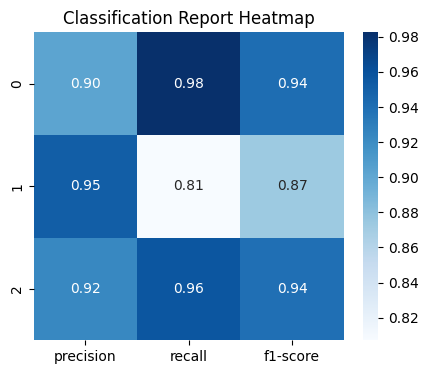

In [ ]:
X = balanced_data['tweet']
y = balanced_data['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

vectorizer = TfidfVectorizer(max_features=5000, stop_words='english', ngram_range=(1, 2))
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

random_forest_classifier(X_train_tfidf, X_test_tfidf, y_train, y_test)

### BOW

Accuracy: 91.59
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.98      0.93       858
           1       0.94      0.81      0.87       700
           2       0.93      0.94      0.94       833

    accuracy                           0.92      2391
   macro avg       0.92      0.91      0.91      2391
weighted avg       0.92      0.92      0.91      2391



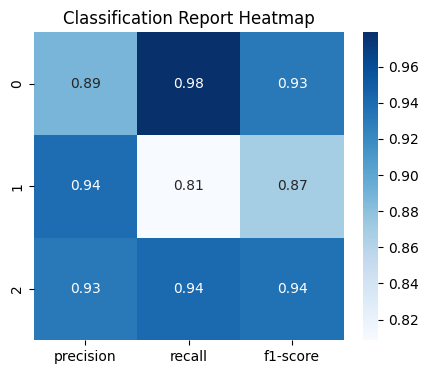

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Text vectorization using Bag of Words
vectorizer = CountVectorizer(max_features=5000, stop_words='english', ngram_range=(1, 2))
X_train_bow = vectorizer.fit_transform(X_train)
X_test_bow = vectorizer.transform(X_test)

random_forest_classifier(X_train_bow, X_test_bow, y_train, y_test)

Since we get performace with BOW, using BOW for all further models

TO DO: try glove ND WORD2VEC

###GloVE

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

texts = balanced_data['tweet']
y = balanced_data['class']

# Path of 200d file
embedding_file = '/content/drive/MyDrive/DATASETS/glove.twitter.27B.200d.txt'
embedding_dim = 200

# Load GloVe embeddings into a dictionary
def load_glove_embeddings(file_path):
    embeddings = {}
    with open(file_path, 'r', encoding="utf8") as f:
        for line in f:
            values = line.split()
            word = values[0]
            vector = np.array(values[1:], dtype='float32')
            embeddings[word] = vector
    return embeddings

embeddings = load_glove_embeddings(embedding_file)

# Function to convert a sentence into an embedding
def text_to_embedding(text, embeddings, embedding_dim):
    words = text.split()
    word_vectors = [embeddings[word] for word in words if word in embeddings]
    if len(word_vectors) > 0:
        return np.mean(word_vectors, axis=0)
    else:
        return np.zeros(embedding_dim)  # If no word is in GloVe, return a zero vector

# Convert text data to embeddings
X = np.array([text_to_embedding(text, embeddings, embedding_dim) for text in texts])

# Split data into training and testing sets
X_train_glove, X_test_glove, y_train_glove, y_test_glove = train_test_split(X, y, test_size=0.25, random_state=42)


Accuracy: 89.66
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.96      0.94      1075
           1       0.89      0.79      0.84       895
           2       0.87      0.92      0.90      1019

    accuracy                           0.90      2989
   macro avg       0.90      0.89      0.89      2989
weighted avg       0.90      0.90      0.90      2989



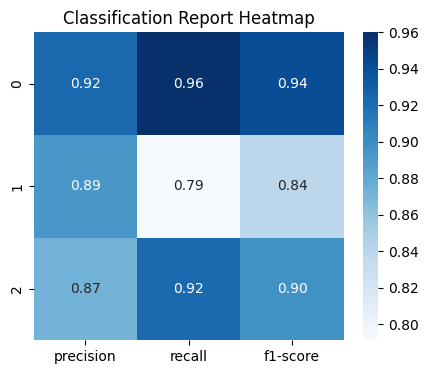

In [ ]:
random_forest_classifier(X_train_glove, X_test_glove, y_train_glove, y_test_glove)

### Word2Vec

In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from gensim.models import Word2Vec, FastText

texts = balanced_data['tweet']
y = balanced_data['class']

# Preprocessing: Tokenize the text
tokenized_texts = [text.split() for text in texts]

# Train Word2Vec model
embedding_dim = 50
word2vec_model = Word2Vec(sentences=tokenized_texts, vector_size=embedding_dim, window=5, min_count=1, workers=4, sg=0)

# Function to convert a sentence into an embedding
def text_to_embedding(text, word2vec_model, embedding_dim):
    words = text.split()
    word_vectors = [word2vec_model.wv[word] for word in words if word in word2vec_model.wv]
    if len(word_vectors) > 0:
        return np.mean(word_vectors, axis=0)
    else:
        return np.zeros(embedding_dim)  # If no word is in Word2Vec, return a zero vector

# Convert text data to embeddings
X = np.array([text_to_embedding(text, word2vec_model, embedding_dim) for text in texts])

# Split data into training and testing sets
X_train_w2v, X_test_w2v, y_train_w2v, y_test_w2v = train_test_split(X, y, test_size=0.25, random_state=42)

Accuracy: 88.02
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.96      0.93      1075
           1       0.88      0.76      0.82       895
           2       0.86      0.91      0.88      1019

    accuracy                           0.88      2989
   macro avg       0.88      0.87      0.87      2989
weighted avg       0.88      0.88      0.88      2989



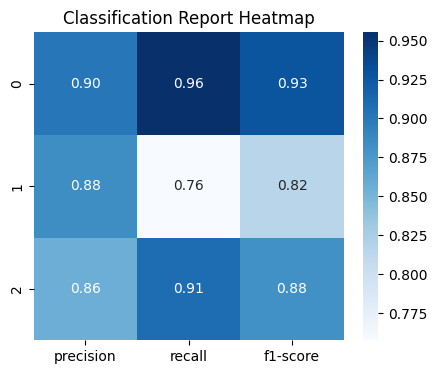

In [ ]:
random_forest_classifier(X_train_w2v, X_test_w2v, y_train_w2v, y_test_w2v)

# Decision Trees

### Gini

Try improving performance

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

def decision_tree_classifier(X_train, X_test, y_train, y_test, criterion):

    dtree_model = DecisionTreeClassifier(criterion=criterion,max_depth=3, min_samples_leaf=10, random_state=42)

    dtree_model.fit(X_train, y_train)

    y_pred = dtree_model.predict(X_test)

    # Evaluate the model
    print("Accuracy:", "%.2f" % (accuracy_score(y_test, y_pred) * 100))
    print("Classification Report:\n", classification_report(y_test, y_pred))

    plot_heatmap(y_test, y_pred)

Decision Tree Gini BoW Classification Report: 
Accuracy: 62.86
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.28      0.41       858
           1       0.79      0.63      0.70       700
           2       0.54      0.99      0.70       833

    accuracy                           0.63      2391
   macro avg       0.71      0.63      0.60      2391
weighted avg       0.70      0.63      0.60      2391



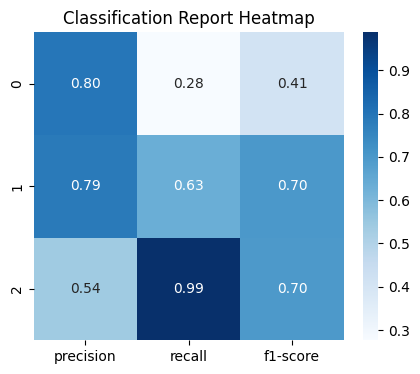




Decision Tree Gini TFIDF Classification Report: 
Accuracy: 62.57
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.24      0.37       858
           1       0.75      0.67      0.71       700
           2       0.54      0.99      0.70       833

    accuracy                           0.63      2391
   macro avg       0.72      0.63      0.59      2391
weighted avg       0.72      0.63      0.58      2391



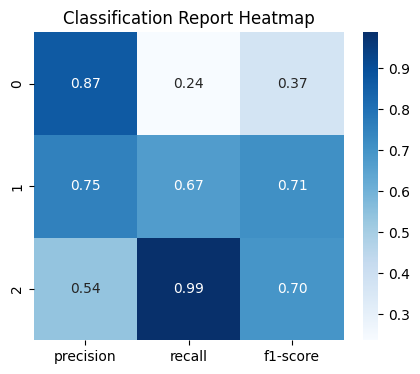




Decision Tree Gini GloVe Classification Report: 
Accuracy: 59.85
Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.43      0.48      1075
           1       0.53      0.66      0.59       895
           2       0.70      0.73      0.71      1019

    accuracy                           0.60      2989
   macro avg       0.60      0.60      0.60      2989
weighted avg       0.60      0.60      0.59      2989



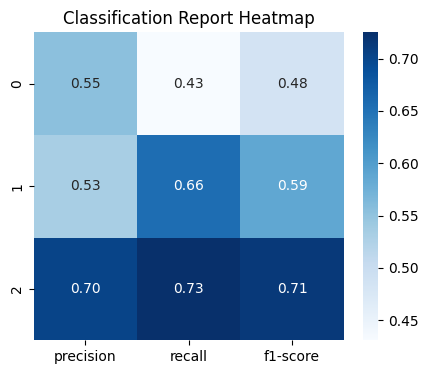




Decision Tree Gini Word2Vec Classification Report: 
Accuracy: 51.15
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.07      0.12      1075
           1       0.50      0.63      0.56       895
           2       0.51      0.88      0.64      1019

    accuracy                           0.51      2989
   macro avg       0.57      0.52      0.44      2989
weighted avg       0.57      0.51      0.43      2989



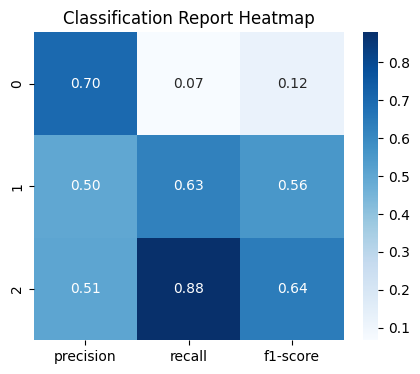

In [ ]:
print("Decision Tree Gini BoW Classification Report: ")
decision_tree_classifier(X_train_bow, X_test_bow, y_train, y_test, criterion = "gini")

print("\n\n\nDecision Tree Gini TFIDF Classification Report: ")
decision_tree_classifier(X_train_tfidf, X_test_tfidf, y_train, y_test, criterion = "gini")

print("\n\n\nDecision Tree Gini GloVe Classification Report: ")
decision_tree_classifier(X_train_glove, X_test_glove, y_train_glove, y_test_glove, criterion = "gini")

print("\n\n\nDecision Tree Gini Word2Vec Classification Report: ")
decision_tree_classifier(X_train_w2v, X_test_w2v, y_train_w2v, y_test_w2v, criterion = "gini")

### Entropy

Decision Tree Entropy BoW Classification Report: 
Accuracy: 58.59
Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.10      0.17       858
           1       0.78      0.71      0.74       700
           2       0.51      0.99      0.67       833

    accuracy                           0.59      2391
   macro avg       0.63      0.60      0.53      2391
weighted avg       0.62      0.59      0.51      2391



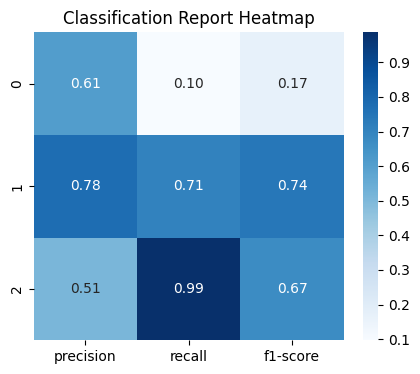




Decision Tree Entropy TFIDF Classification Report: 
Accuracy: 58.43
Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.09      0.16       858
           1       0.77      0.71      0.74       700
           2       0.51      0.99      0.67       833

    accuracy                           0.58      2391
   macro avg       0.63      0.60      0.52      2391
weighted avg       0.62      0.58      0.51      2391



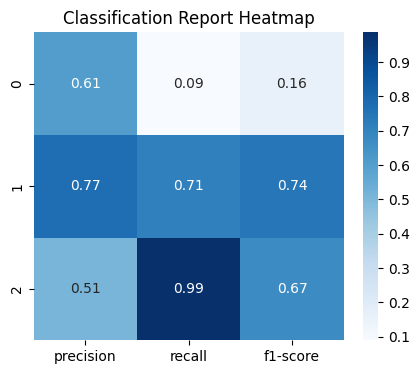




Decision Tree Entropy GloVe Classification Report: 
Accuracy: 60.76
Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.36      0.46      1075
           1       0.53      0.70      0.61       895
           2       0.66      0.79      0.72      1019

    accuracy                           0.61      2989
   macro avg       0.61      0.62      0.59      2989
weighted avg       0.62      0.61      0.59      2989



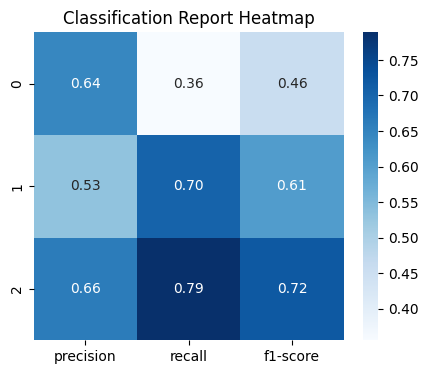




Decision Tree Entropy Word2Vec Classification Report: 
Accuracy: 50.75
Classification Report:
               precision    recall  f1-score   support

           0       0.39      0.20      0.27      1075
           1       0.48      0.67      0.56       895
           2       0.59      0.68      0.63      1019

    accuracy                           0.51      2989
   macro avg       0.49      0.52      0.49      2989
weighted avg       0.49      0.51      0.48      2989



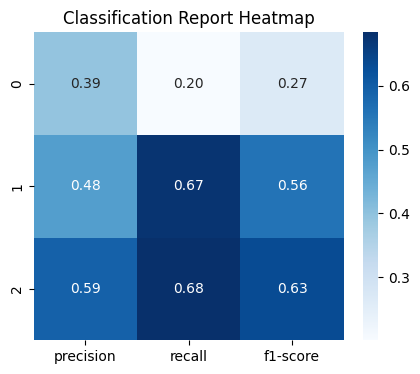

In [ ]:
print("Decision Tree Entropy BoW Classification Report: ")
decision_tree_classifier(X_train_bow, X_test_bow, y_train, y_test, criterion = "entropy")

print("\n\n\nDecision Tree Entropy TFIDF Classification Report: ")
decision_tree_classifier(X_train_tfidf, X_test_tfidf, y_train, y_test, criterion = "entropy")

print("\n\n\nDecision Tree Entropy GloVe Classification Report: ")
decision_tree_classifier(X_train_glove, X_test_glove, y_train_glove, y_test_glove, criterion = "entropy")

print("\n\n\nDecision Tree Entropy Word2Vec Classification Report: ")
decision_tree_classifier(X_train_w2v, X_test_w2v, y_train_w2v, y_test_w2v, criterion = "entropy")

### Log Loss

Decision Tree Log Loss BoW Classification Report: 
Accuracy: 58.59
Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.10      0.17       858
           1       0.78      0.71      0.74       700
           2       0.51      0.99      0.67       833

    accuracy                           0.59      2391
   macro avg       0.63      0.60      0.53      2391
weighted avg       0.62      0.59      0.51      2391



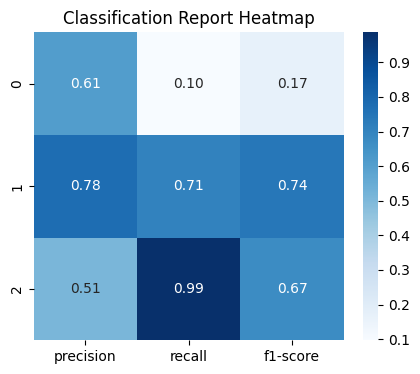




Decision Tree Log Loss TFIDF Classification Report: 
Accuracy: 58.43
Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.09      0.16       858
           1       0.77      0.71      0.74       700
           2       0.51      0.99      0.67       833

    accuracy                           0.58      2391
   macro avg       0.63      0.60      0.52      2391
weighted avg       0.62      0.58      0.51      2391



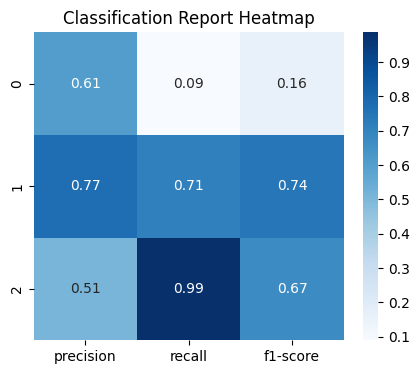




Decision Tree Log Loss GloVe Classification Report: 
Accuracy: 60.76
Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.36      0.46      1075
           1       0.53      0.70      0.61       895
           2       0.66      0.79      0.72      1019

    accuracy                           0.61      2989
   macro avg       0.61      0.62      0.59      2989
weighted avg       0.62      0.61      0.59      2989



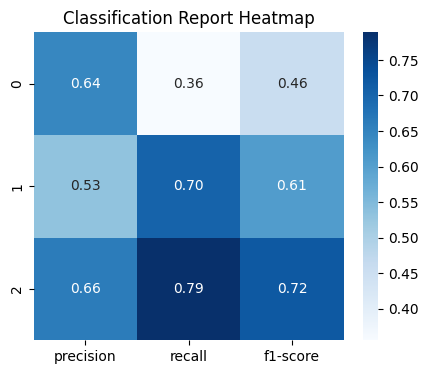




Decision Tree Log Loss Word2Vec Classification Report: 
Accuracy: 50.75
Classification Report:
               precision    recall  f1-score   support

           0       0.39      0.20      0.27      1075
           1       0.48      0.67      0.56       895
           2       0.59      0.68      0.63      1019

    accuracy                           0.51      2989
   macro avg       0.49      0.52      0.49      2989
weighted avg       0.49      0.51      0.48      2989



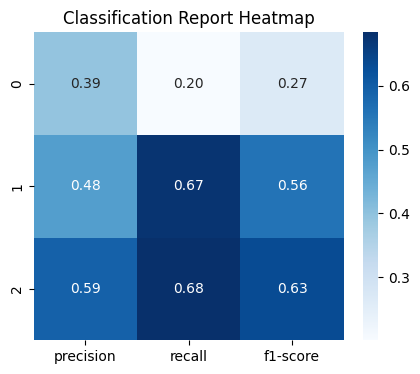

In [ ]:
print("Decision Tree Log Loss BoW Classification Report: ")
decision_tree_classifier(X_train_bow, X_test_bow, y_train, y_test, criterion = "log_loss")

print("\n\n\nDecision Tree Log Loss TFIDF Classification Report: ")
decision_tree_classifier(X_train_tfidf, X_test_tfidf, y_train, y_test, criterion = "log_loss")

print("\n\n\nDecision Tree Log Loss GloVe Classification Report: ")
decision_tree_classifier(X_train_glove, X_test_glove, y_train_glove, y_test_glove, criterion = "log_loss")

print("\n\n\nDecision Tree Log Loss Word2Vec Classification Report: ")
decision_tree_classifier(X_train_w2v, X_test_w2v, y_train_w2v, y_test_w2v, criterion = "log_loss")

###Use Cross-Validation

In [ ]:
from sklearn.model_selection import cross_val_score, cross_val_predict

def dtree_cross_val_classifier(X_train, X_test, y_train, y_test, k):
  # Initialize the Decision Tree model
  dt_model = DecisionTreeClassifier(criterion="gini", random_state=42)

  # Perform k-fold cross-validation
  cv_scores = cross_val_score(dt_model, X_train, y_train, cv=k)
  y_pred = cross_val_predict(dt_model, X_test, y_test, cv=k)

  # Evaluate
  acc_cv = accuracy_score(y_test, y_pred) * 100
  print("Cross-validated =", k, "\nAccuracy:" , "%.2f" % (acc_cv),"%")
  for i, score in enumerate(cv_scores):
    print("Fold", (i+1), ": %.2f" % (score * 100), "%")
  print("Classification Report:\n", classification_report(y_test, y_pred))

#### K = 5

In [ ]:
print("\nDecision Tree with CV = 5 BoW Classification Report: ")
dtree_cross_val_classifier(X_train_bow, X_test_bow, y_train, y_test, 5)
print("\nDecision Tree with CV = 5 TFIDF Classification Report: ")
dtree_cross_val_classifier(X_train_tfidf, X_test_tfidf, y_train, y_test, 5)
print("\nDecision Tree with CV = 5 GloVe Classification Report: ")
dtree_cross_val_classifier(X_train_glove, X_test_glove, y_train_glove, y_test_glove, 5)
print("\nDecision Tree with CV = 5 Word2Vec Classification Report: ")
dtree_cross_val_classifier(X_train_w2v, X_test_w2v, y_train_w2v, y_test_w2v, 5)


Decision Tree with CV = 5 BoW Classification Report: 
Cross-validated = 5 
Accuracy: 76.62 %
Fold 1 : 87.82 %
Fold 2 : 87.35 %
Fold 3 : 88.18 %
Fold 4 : 88.28 %
Fold 5 : 88.28 %
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.73      0.74       858
           1       0.68      0.73      0.71       700
           2       0.86      0.84      0.85       833

    accuracy                           0.77      2391
   macro avg       0.76      0.76      0.76      2391
weighted avg       0.77      0.77      0.77      2391


Decision Tree with CV = 5 TFIDF Classification Report: 
Cross-validated = 5 
Accuracy: 78.63 %
Fold 1 : 88.03 %
Fold 2 : 88.19 %
Fold 3 : 89.38 %
Fold 4 : 88.55 %
Fold 5 : 87.97 %
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.75      0.75       858
           1       0.74      0.72      0.73       700
           2       0.85      0.89      0.87     

#### K = 10

In [ ]:
print("\nDecision Tree with CV = 10 BoW Classification Report: ")
dtree_cross_val_classifier(X_train_bow, X_test_bow, y_train, y_test, 10)
print("\nDecision Tree with CV = 10 TFIDF Classification Report: ")
dtree_cross_val_classifier(X_train_tfidf, X_test_tfidf, y_train, y_test, 10)
print("\nDecision Tree with CV = 10 GloVe Classification Report: ")
dtree_cross_val_classifier(X_train_glove, X_test_glove, y_train_glove, y_test_glove, 10)
print("\nDecision Tree with CV = 10 Word2Vec Classification Report: ")
dtree_cross_val_classifier(X_train_w2v, X_test_w2v, y_train_w2v, y_test_w2v, 10)


Decision Tree with CV = 10 BoW Classification Report: 
Cross-validated = 10 
Accuracy: 76.83 %
Fold 1 : 87.88 %
Fold 2 : 89.45 %
Fold 3 : 88.08 %
Fold 4 : 87.87 %
Fold 5 : 88.70 %
Fold 6 : 90.48 %
Fold 7 : 89.54 %
Fold 8 : 89.33 %
Fold 9 : 87.66 %
Fold 10 : 91.11 %
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.76      0.75       858
           1       0.69      0.71      0.70       700
           2       0.87      0.82      0.84       833

    accuracy                           0.77      2391
   macro avg       0.77      0.77      0.77      2391
weighted avg       0.77      0.77      0.77      2391


Decision Tree with CV = 10 TFIDF Classification Report: 
Cross-validated = 10 
Accuracy: 79.09 %
Fold 1 : 87.88 %
Fold 2 : 89.97 %
Fold 3 : 87.97 %
Fold 4 : 89.02 %
Fold 5 : 89.75 %
Fold 6 : 90.27 %
Fold 7 : 89.64 %
Fold 8 : 89.54 %
Fold 9 : 87.97 %
Fold 10 : 88.91 %
Classification Report:
               precision    recall  

### Hyperparameter Tuning using GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Define parameter grid
param_grid = {
    'criterion': ['gini', 'entropy','log_loss'],
    'max_depth': [3, 5, 10, 15, None],
    'min_samples_split': [2, 10, 20, 30],
    'min_samples_leaf': [1, 5, 10, 20],
    'max_features': ['auto', 'sqrt', 'log2', None],
    'class_weight': [None, 'balanced']
}

# Create Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)

# Perform Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit grid search
grid_search.fit(X_train_bow, y_train)

# Get best hyperparameters
print("Best parameters found: ", grid_search.best_params_)

Fitting 5 folds for each of 1920 candidates, totalling 9600 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
2400 fits failed out of a total of 9600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2400 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/u

Best parameters found:  {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [ ]:
def best_dtree_classifier(X_train, X_test, y_train, y_test, best_params):
  best_dtree = DecisionTreeClassifier(**grid_search.best_params_)
  best_dtree.fit(X_train, y_train)
  y_pred_best = best_dtree.predict(X_test)

  print("Accuracy:", "%.2f" % (accuracy_score(y_test, y_pred_best) * 100))
  print("Classification Report:\n", classification_report(y_test, y_pred_best))

  plot_heatmap(y_test, y_pred_best)

Decision Tree Grid Search BoW using Best Parameter: 
Accuracy: 89.04
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.97      0.91       858
           1       0.90      0.77      0.83       700
           2       0.93      0.90      0.91       833

    accuracy                           0.89      2391
   macro avg       0.89      0.88      0.89      2391
weighted avg       0.89      0.89      0.89      2391



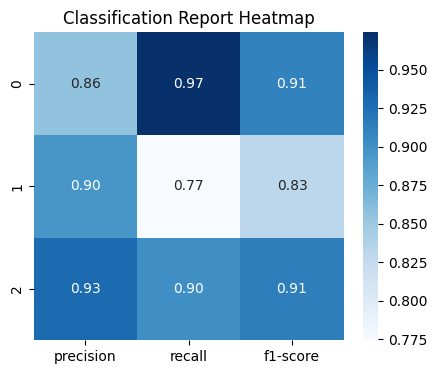




Decision Tree Grid Search TFIDF using Best Parameter: 
Accuracy: 90.17
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.98      0.92       858
           1       0.92      0.79      0.85       700
           2       0.94      0.92      0.93       833

    accuracy                           0.90      2391
   macro avg       0.91      0.90      0.90      2391
weighted avg       0.90      0.90      0.90      2391



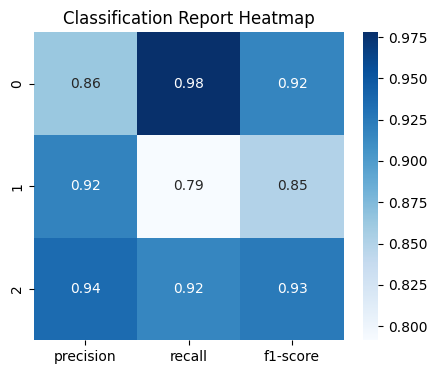




Decision Tree Grid Search GloVe using Best Parameter: 
Accuracy: 78.42
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.96      0.85      1075
           1       0.76      0.64      0.70       895
           2       0.83      0.72      0.77      1019

    accuracy                           0.78      2989
   macro avg       0.79      0.78      0.77      2989
weighted avg       0.79      0.78      0.78      2989



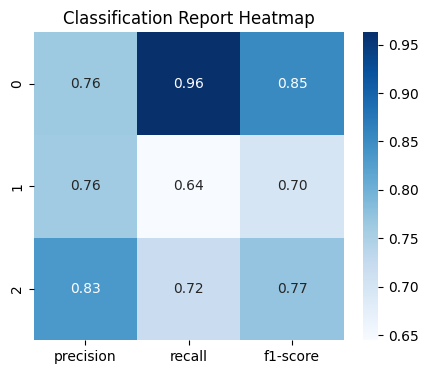




Decision Tree Grid Search Word2Vec using Best Parameter: 
Accuracy: 77.72
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.96      0.84      1075
           1       0.79      0.64      0.71       895
           2       0.81      0.71      0.76      1019

    accuracy                           0.78      2989
   macro avg       0.78      0.77      0.77      2989
weighted avg       0.78      0.78      0.77      2989



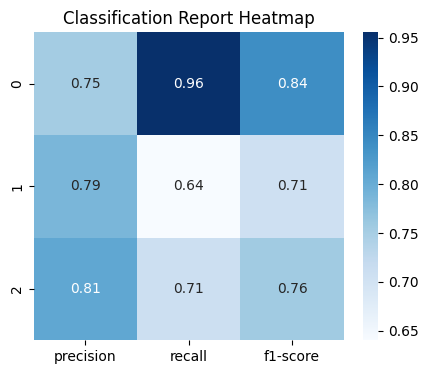

In [ ]:
print("Decision Tree Grid Search BoW using Best Parameter: ")
best_dtree_classifier(X_train_bow, X_test_bow, y_train, y_test, grid_search.best_params_)

print("\n\n\nDecision Tree Grid Search TFIDF using Best Parameter: ")
best_dtree_classifier(X_train_tfidf, X_test_tfidf, y_train, y_test, grid_search.best_params_)

print("\n\n\nDecision Tree Grid Search GloVe using Best Parameter: ")
best_dtree_classifier(X_train_glove, X_test_glove, y_train_glove, y_test_glove, grid_search.best_params_)

print("\n\n\nDecision Tree Grid Search Word2Vec using Best Parameter: ")
best_dtree_classifier(X_train_w2v, X_test_w2v, y_train_w2v, y_test_w2v, grid_search.best_params_)

### Random Search (Randomized Search)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Define the hyperparameter grid
param_grid = {
    'criterion': ['gini', 'entropy','log_loss'],
    'max_depth': [3, 5, 10, 15, None],
    'min_samples_split': [2, 10, 20, 30],
    'min_samples_leaf': [1, 5, 10, 20],
    'max_features': ['auto', 'sqrt', 'log2', None],
    'class_weight': [None, 'balanced']
}

# Initialize the Decision Tree model
dt = DecisionTreeClassifier(random_state=42)

# Perform Random Search with 5-fold cross-validation
random_search = RandomizedSearchCV(estimator=dt, param_distributions=param_grid,
                                   n_iter=100, cv=5, n_jobs=-1, verbose=2, random_state=42)

# Fit the model
random_search.fit(X_train_bow, y_train)

# Get the best parameters
print("Best Hyperparameters:", random_search.best_params_)


Fitting 5 folds for each of 100 candidates, totalling 500 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
140 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
140 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/util

Best Hyperparameters: {'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': None, 'criterion': 'log_loss', 'class_weight': None}


Decision Tree Grid Search BoW using Best Parameter: 
Accuracy: 89.34
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.98      0.92       858
           1       0.90      0.78      0.83       700
           2       0.93      0.91      0.92       833

    accuracy                           0.89      2391
   macro avg       0.90      0.89      0.89      2391
weighted avg       0.90      0.89      0.89      2391



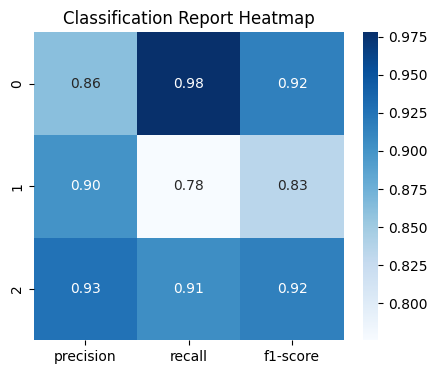

Decision Tree Grid Search TFIDF using Best Parameter: 
Accuracy: 90.00
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.98      0.91       858
           1       0.93      0.78      0.85       700
           2       0.93      0.92      0.92       833

    accuracy                           0.90      2391
   macro avg       0.91      0.89      0.90      2391
weighted avg       0.90      0.90      0.90      2391



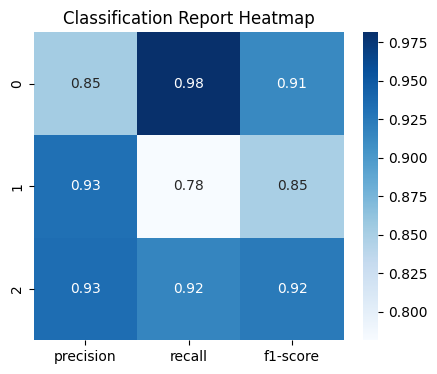

Decision Tree Grid Search GloVe using Best Parameter: 
Accuracy: 78.19
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.97      0.86      1075
           1       0.75      0.65      0.70       895
           2       0.83      0.70      0.76      1019

    accuracy                           0.78      2989
   macro avg       0.78      0.77      0.77      2989
weighted avg       0.78      0.78      0.78      2989



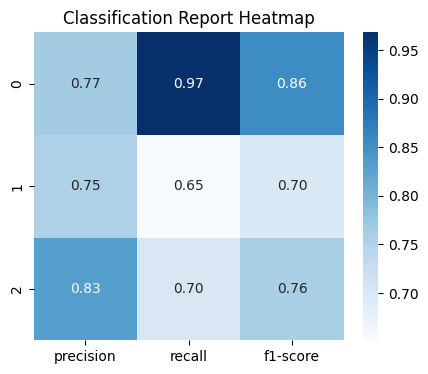

Decision Tree Grid Search Word2Vec using Best Parameter: 
Accuracy: 77.28
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.95      0.84      1075
           1       0.77      0.63      0.70       895
           2       0.80      0.70      0.75      1019

    accuracy                           0.77      2989
   macro avg       0.78      0.76      0.76      2989
weighted avg       0.78      0.77      0.77      2989



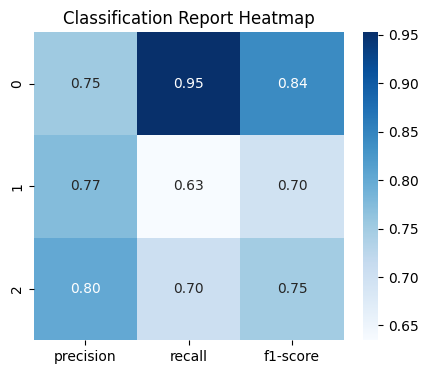

In [ ]:
print("Decision Tree Grid Search BoW using Best Parameter: ")
best_dtree_classifier(X_train_bow, X_test_bow, y_train, y_test, random_search.best_params_)

print("Decision Tree Grid Search TFIDF using Best Parameter: ")
best_dtree_classifier(X_train_tfidf, X_test_tfidf, y_train, y_test, random_search.best_params_)

print("Decision Tree Grid Search GloVe using Best Parameter: ")
best_dtree_classifier(X_train_glove, X_test_glove, y_train_glove, y_test_glove, random_search.best_params_)

print("Decision Tree Grid Search Word2Vec using Best Parameter: ")
best_dtree_classifier(X_train_w2v, X_test_w2v, y_train_w2v, y_test_w2v, random_search.best_params_)

### Bayesian Optimization

In [ ]:
!pip install scikit-optimize

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 2.7 MB/s eta 0:00:00


In [ ]:
from skopt import BayesSearchCV
from sklearn.tree import DecisionTreeClassifier

# Define the parameter space
param_space = {
    'criterion': ['gini', 'entropy','log_loss'],
    'max_depth': (3, 5, 10, None) ,
    'min_samples_split': (2, 10, 20, 30),
    'min_samples_leaf': (1, 5, 10, 20),
    'max_features'		: ['sqrt', 'log2', None],
    'class_weight'		: [None, 'balanced']
}

# Initialize the Decision Tree model
dt = DecisionTreeClassifier(random_state=42)

# Perform Bayesian optimization with 5-fold cross-validation
opt = BayesSearchCV(dt, param_space, n_iter=50, cv=5, n_jobs=-1, verbose=2)
opt.fit(X_train_bow, y_train)

# Get the best parameters
print("Best Hyperparameters:", opt.best_params_)


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

Decision Tree Grid Search BoW using Best Parameter: 
Accuracy: 88.96
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.98      0.91       858
           1       0.90      0.76      0.83       700
           2       0.92      0.90      0.91       833

    accuracy                           0.89      2391
   macro avg       0.89      0.88      0.88      2391
weighted avg       0.89      0.89      0.89      2391



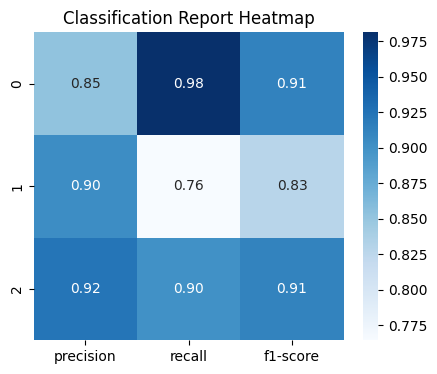




Decision Tree Grid Search TFIDF using Best Parameter: 
Accuracy: 89.59
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.98      0.91       858
           1       0.92      0.78      0.84       700
           2       0.94      0.91      0.92       833

    accuracy                           0.90      2391
   macro avg       0.90      0.89      0.89      2391
weighted avg       0.90      0.90      0.89      2391



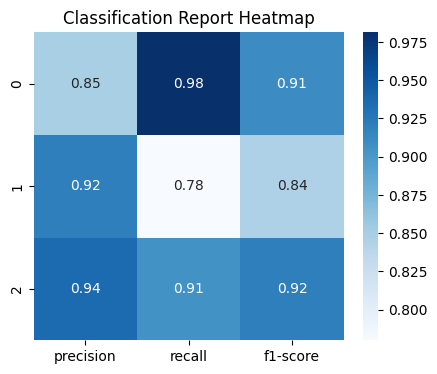




Decision Tree Grid Search GloVe using Best Parameter: 
Accuracy: 77.79
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.96      0.85      1075
           1       0.75      0.65      0.70       895
           2       0.84      0.69      0.76      1019

    accuracy                           0.78      2989
   macro avg       0.78      0.77      0.77      2989
weighted avg       0.78      0.78      0.77      2989



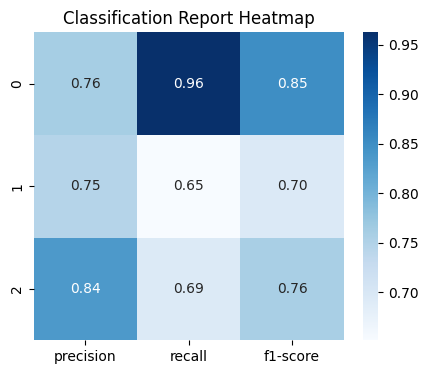




Decision Tree Grid Search Word2Vec using Best Parameter: 
Accuracy: 76.95
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.96      0.84      1075
           1       0.77      0.62      0.69       895
           2       0.80      0.71      0.75      1019

    accuracy                           0.77      2989
   macro avg       0.77      0.76      0.76      2989
weighted avg       0.77      0.77      0.76      2989



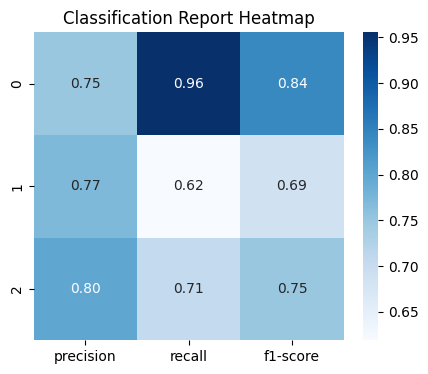

In [ ]:
print("Decision Tree Grid Search BoW using Best Parameter: ")
best_dtree_classifier(X_train_bow, X_test_bow, y_train, y_test,  opt.best_params_)

print("\n\n\nDecision Tree Grid Search TFIDF using Best Parameter: ")
best_dtree_classifier(X_train_tfidf, X_test_tfidf, y_train, y_test,  opt.best_params_)

print("\n\n\nDecision Tree Grid Search GloVe using Best Parameter: ")
best_dtree_classifier(X_train_glove, X_test_glove, y_train_glove, y_test_glove,  opt.best_params_)

print("\n\n\nDecision Tree Grid Search Word2Vec using Best Parameter: ")
best_dtree_classifier(X_train_w2v, X_test_w2v, y_train_w2v, y_test_w2v,  opt.best_params_)

# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import math

def KNN_classifier(X_train, X_test, y_train, y_test, k, w):
    knn = KNeighborsClassifier(n_neighbors=k, weights=w)
    knn.fit(X_train, y_train)
    y_pred_knn = knn.predict(X_test)

    print("Accuracy:", "%.2f" % (accuracy_score(y_test, y_pred_knn) * 100),"%")
    print("Classification Report:\n", classification_report(y_test, y_pred_knn))

    plot_heatmap(y_test, y_pred_knn)

In [ ]:
# Determine the optimal k using the Elbow Method
errors = []
k_values = range(1, int(math.sqrt(len(balanced_data))), 2)
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
    knn.fit(X_train_bow, y_train)
    y_pred_knn = knn.predict(X_test_bow)
    error = 1 - accuracy_score(y_test, y_pred_knn)
    errors.append(error)

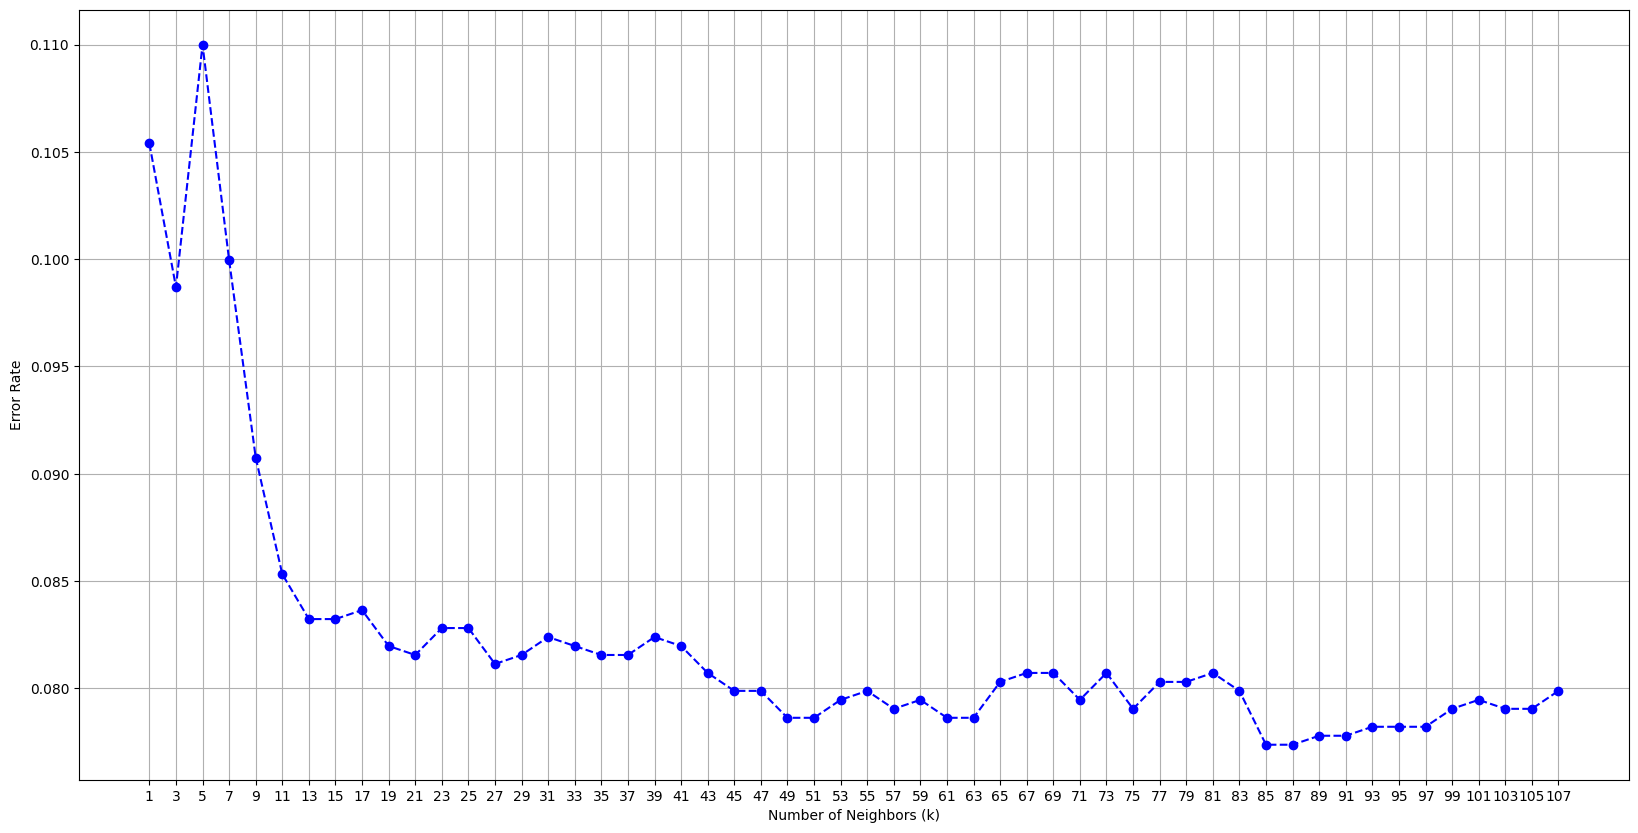

In [ ]:
# Plot errors
plt.figure(figsize=(20, 10))
plt.plot(k_values, errors, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Error Rate')
plt.xticks(k_values)
plt.grid()
plt.show()

Optimal k: 85
Accuracy: 92.26 %
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96       858
           1       0.94      0.80      0.87       700
           2       0.88      0.98      0.93       833

    accuracy                           0.92      2391
   macro avg       0.93      0.92      0.92      2391
weighted avg       0.93      0.92      0.92      2391



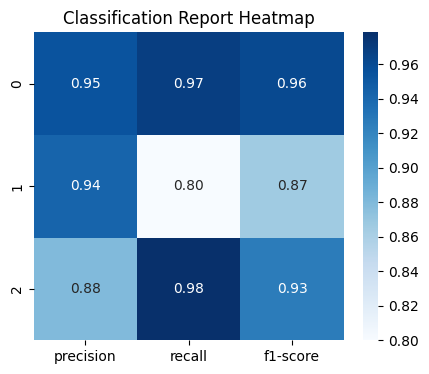

In [ ]:
# get k with lease error
best_k = k_values[np.argmin(errors)]
print(f"Optimal k: {best_k}")

KNN_classifier(X_train_bow, X_test_bow, y_train, y_test, best_k, w = 'distance')

WEIGHTS = UNIFORM
KNN Classification Report with BoW
Accuracy: 72.65 %
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.44      0.59       858
           1       0.71      0.79      0.75       700
           2       0.68      0.96      0.80       833

    accuracy                           0.73      2391
   macro avg       0.76      0.73      0.71      2391
weighted avg       0.76      0.73      0.71      2391



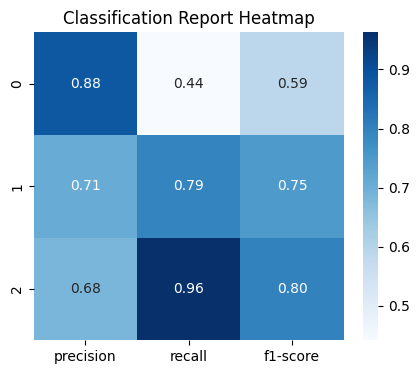




KNN Classification Report with TF-IDF
Accuracy: 73.23 %
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.53      0.65       858
           1       0.70      0.71      0.71       700
           2       0.70      0.96      0.81       833

    accuracy                           0.73      2391
   macro avg       0.75      0.73      0.72      2391
weighted avg       0.75      0.73      0.72      2391



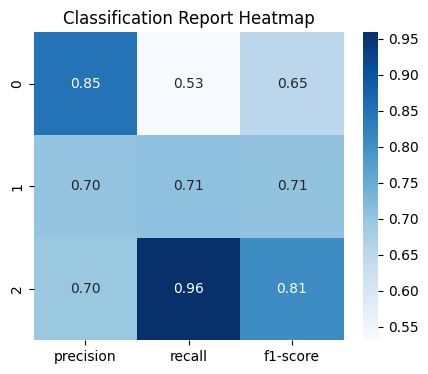




KNN Classification Report with GloVe
Accuracy: 70.76 %
Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.80      0.68      1075
           1       0.75      0.58      0.66       895
           2       0.85      0.72      0.78      1019

    accuracy                           0.71      2989
   macro avg       0.73      0.70      0.71      2989
weighted avg       0.73      0.71      0.71      2989



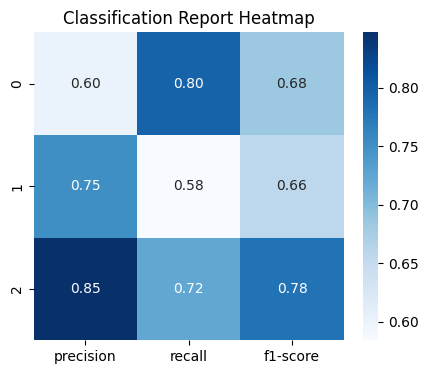




KNN Classification Report with Word2Vec
Accuracy: 56.67 %
Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.24      0.34      1075
           1       0.56      0.66      0.60       895
           2       0.57      0.83      0.68      1019

    accuracy                           0.57      2989
   macro avg       0.57      0.58      0.54      2989
weighted avg       0.57      0.57      0.53      2989



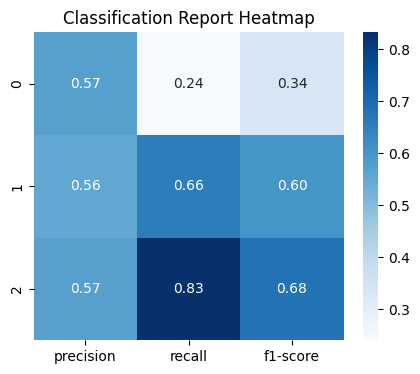

In [ ]:
print("WEIGHTS = UNIFORM")
print("KNN Classification Report with BoW")
KNN_classifier(X_train_bow, X_test_bow, y_train, y_test, 69, w = 'uniform')
print("\n\n\nKNN Classification Report with TF-IDF")
KNN_classifier(X_train_tfidf, X_test_tfidf, y_train, y_test, 69, w = 'uniform')
print("\n\n\nKNN Classification Report with GloVe")
KNN_classifier(X_train_glove, X_test_glove, y_train_glove, y_test_glove, 69, w = 'uniform')
print("\n\n\nKNN Classification Report with Word2Vec")
KNN_classifier(X_train_w2v, X_test_w2v, y_train_w2v, y_test_w2v, 69, w = 'uniform')

WEIGHTS = DISTANCE
KNN Classification Report with BoW
Accuracy: 91.93 %
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.96       858
           1       0.95      0.80      0.87       700
           2       0.88      0.97      0.92       833

    accuracy                           0.92      2391
   macro avg       0.92      0.91      0.91      2391
weighted avg       0.92      0.92      0.92      2391



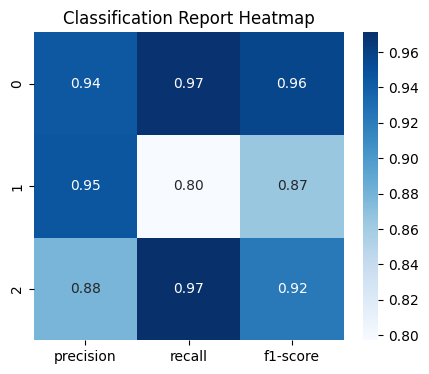

KNN Classification Report with TF-IDF
Accuracy: 88.54 %
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.95       858
           1       0.94      0.68      0.79       700
           2       0.82      0.97      0.89       833

    accuracy                           0.89      2391
   macro avg       0.89      0.87      0.88      2391
weighted avg       0.89      0.89      0.88      2391



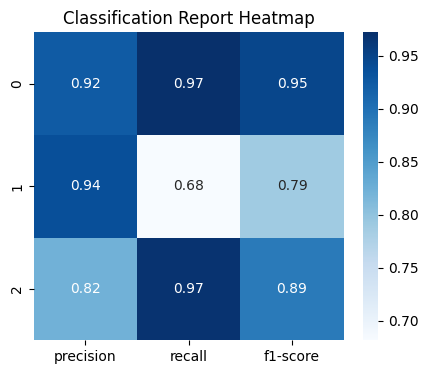

KNN Classification Report with GloVe
Accuracy: 77.79 %
Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.97      0.78      1075
           1       0.89      0.59      0.71       895
           2       0.93      0.74      0.82      1019

    accuracy                           0.78      2989
   macro avg       0.83      0.77      0.77      2989
weighted avg       0.82      0.78      0.78      2989



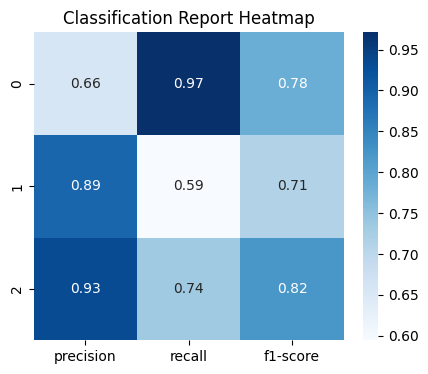

KNN Classification Report with Word2Vec
Accuracy: 83.24 %
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.96      0.91      1075
           1       0.84      0.67      0.75       895
           2       0.80      0.84      0.82      1019

    accuracy                           0.83      2989
   macro avg       0.83      0.82      0.82      2989
weighted avg       0.83      0.83      0.83      2989



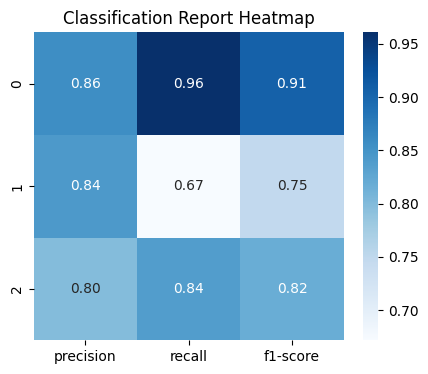

In [ ]:
print("WEIGHTS = DISTANCE")
print("KNN Classification Report with BoW")
KNN_classifier(X_train_bow, X_test_bow, y_train, y_test, 69, w = 'distance')
print("KNN Classification Report with TF-IDF")
KNN_classifier(X_train_tfidf, X_test_tfidf, y_train, y_test, 69, w = 'distance')
print("KNN Classification Report with GloVe")
KNN_classifier(X_train_glove, X_test_glove, y_train_glove, y_test_glove, 69, w = 'distance')
print("KNN Classification Report with Word2Vec")
KNN_classifier(X_train_w2v, X_test_w2v, y_train_w2v, y_test_w2v, 69, w = 'distance')

### Hyperparameter tuning using GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors': [7, 17, 29, 37, 47, 59, 67, 79, 89, 97, 107],
              'weights': ['uniform', 'distance'],
              'metric': ['euclidean', 'manhattan', 'minkowski']}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search.fit(X_train_bow, y_train)
print(grid_search.best_params_)

{'metric': 'manhattan', 'n_neighbors': 29, 'weights': 'distance'}


Accuracy: 91.76
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.95       858
           1       0.95      0.79      0.86       700
           2       0.88      0.97      0.92       833

    accuracy                           0.92      2391
   macro avg       0.92      0.91      0.91      2391
weighted avg       0.92      0.92      0.92      2391



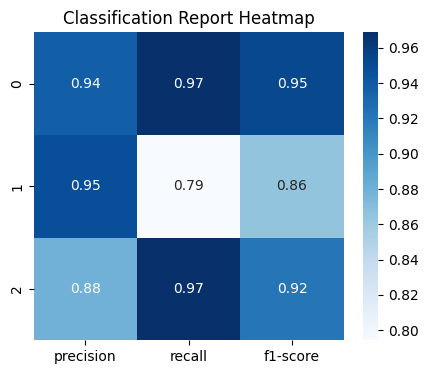

In [ ]:
y_pred_knn = grid_search.predict(X_test_bow)
print("Accuracy:", "%.2f" % (accuracy_score(y_test, y_pred_knn) * 100))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))
plot_heatmap(y_test, y_pred_knn)

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

def logistic_regression_classifier(X_train, X_test, y_train, y_test, solver, penalty,l1_ratio = None):
  # Train model using Logistic Regression
  log_reg = LogisticRegression(max_iter=1000, random_state=100, solver = solver, penalty = penalty, l1_ratio = l1_ratio)
  log_reg.fit(X_train, y_train)

  # Predict on test data
  y_pred_log_reg = log_reg.predict(X_test)

  # Evaluate the model
  print("Accuracy:", "%.2f" % (accuracy_score(y_test, y_pred_log_reg) * 100),"%")
  print("Classification Report:\n", classification_report(y_test, y_pred_log_reg))

  plot_heatmap(y_test, y_pred_log_reg)

### Solver : 'newton-cg' and Penalty : 'l2'

#### Without Regularization

Solver : 'newton-cg' and Penalty : None 
Logistic Regression Classification Report with BoW
Accuracy: 82.52 %
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.97      0.89       858
           1       0.78      0.66      0.72       700
           2       0.86      0.82      0.84       833

    accuracy                           0.83      2391
   macro avg       0.82      0.82      0.81      2391
weighted avg       0.82      0.83      0.82      2391



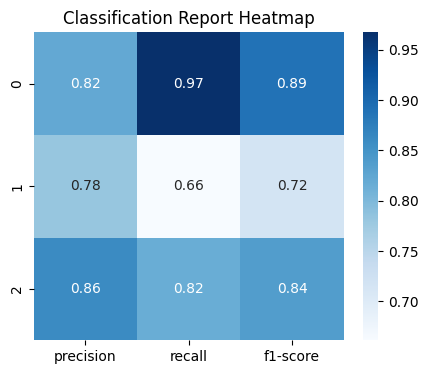

Logistic Regression Classification Report with TF-IDF
Accuracy: 79.38 %
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.97      0.89       858
           1       0.73      0.60      0.66       700
           2       0.81      0.77      0.79       833

    accuracy                           0.79      2391
   macro avg       0.79      0.78      0.78      2391
weighted avg       0.79      0.79      0.79      2391



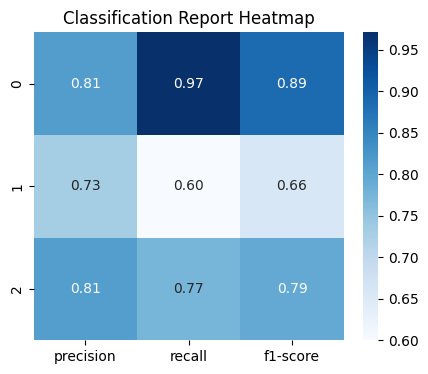

Logistic Regression Classification Report with GloVe
Accuracy: 76.92 %
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.70      0.72      1075
           1       0.73      0.73      0.73       895
           2       0.82      0.88      0.85      1019

    accuracy                           0.77      2989
   macro avg       0.77      0.77      0.77      2989
weighted avg       0.77      0.77      0.77      2989



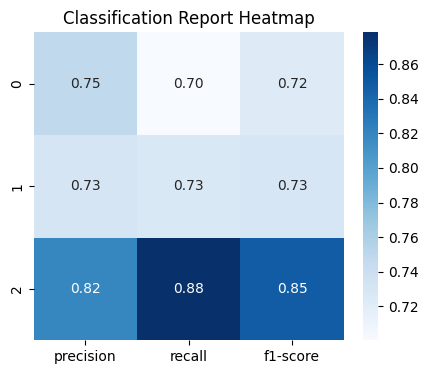

Logistic Regression Classification Report with Word2Vec
Accuracy: 70.06 %
Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.59      0.62      1075
           1       0.73      0.64      0.68       895
           2       0.73      0.87      0.79      1019

    accuracy                           0.70      2989
   macro avg       0.70      0.70      0.70      2989
weighted avg       0.70      0.70      0.70      2989



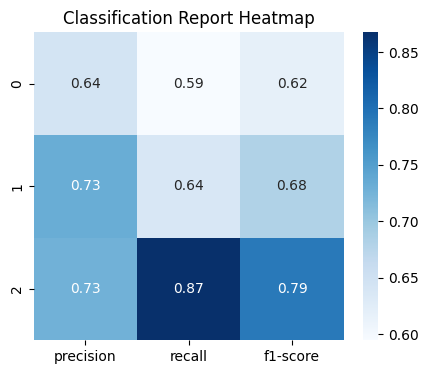

In [ ]:
print("Solver : 'newton-cg' and Penalty : None ")
print("Logistic Regression Classification Report with BoW")
logistic_regression_classifier(X_train_bow, X_test_bow, y_train, y_test, 'newton-cg', None)
print("Logistic Regression Classification Report with TF-IDF")
logistic_regression_classifier(X_train_tfidf, X_test_tfidf, y_train, y_test,'newton-cg', None)
print("Logistic Regression Classification Report with GloVe")
logistic_regression_classifier(X_train_glove, X_test_glove, y_train_glove, y_test_glove,'newton-cg', None)
print("Logistic Regression Classification Report with Word2Vec")
logistic_regression_classifier(X_train_w2v, X_test_w2v, y_train_w2v, y_test_w2v, 'newton-cg', None)

#### With Regularization

Solver : 'newton-cg' and Penalty : 'l2'
Logistic Regression Classification Report with BoW
Accuracy: 88.92 %
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.92      0.89       858
           1       0.89      0.78      0.83       700
           2       0.91      0.95      0.93       833

    accuracy                           0.89      2391
   macro avg       0.89      0.88      0.89      2391
weighted avg       0.89      0.89      0.89      2391



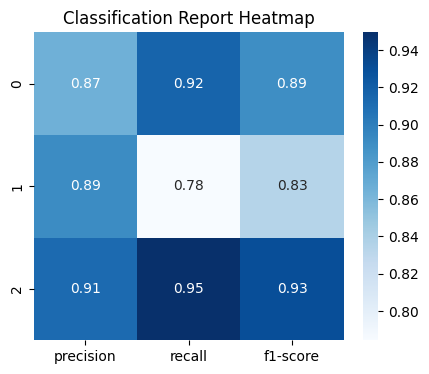

Logistic Regression Classification Report with TF-IDF
Accuracy: 85.65 %
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.85      0.84       858
           1       0.83      0.77      0.80       700
           2       0.89      0.94      0.91       833

    accuracy                           0.86      2391
   macro avg       0.85      0.85      0.85      2391
weighted avg       0.86      0.86      0.86      2391



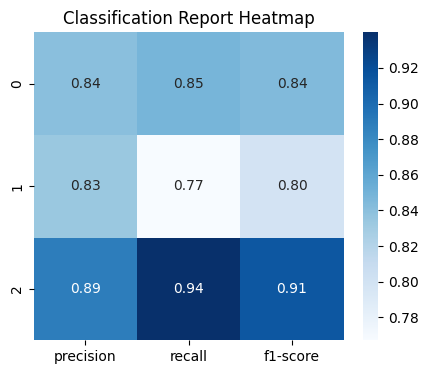

Logistic Regression Classification Report with GloVe
Accuracy: 77.15 %
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.70      0.72      1075
           1       0.74      0.73      0.73       895
           2       0.82      0.88      0.85      1019

    accuracy                           0.77      2989
   macro avg       0.77      0.77      0.77      2989
weighted avg       0.77      0.77      0.77      2989



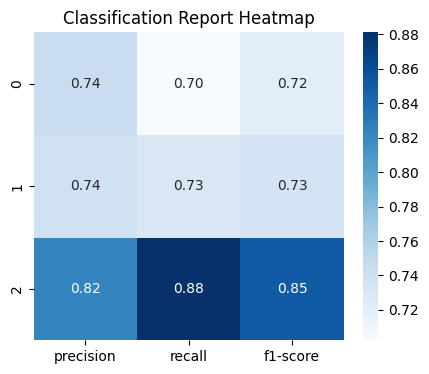

Logistic Regression Classification Report with Word2Vec
Accuracy: 59.89 %
Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.46      0.49      1075
           1       0.67      0.49      0.57       895
           2       0.61      0.84      0.71      1019

    accuracy                           0.60      2989
   macro avg       0.60      0.60      0.59      2989
weighted avg       0.60      0.60      0.59      2989



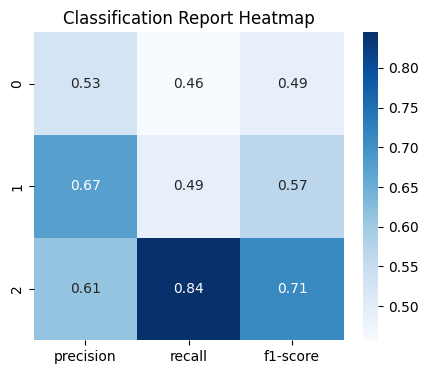

In [ ]:
print("Solver : 'newton-cg' and Penalty : 'l2'")
print("Logistic Regression Classification Report with BoW")
logistic_regression_classifier(X_train_bow, X_test_bow, y_train, y_test, 'newton-cg', 'l2')
print("Logistic Regression Classification Report with TF-IDF")
logistic_regression_classifier(X_train_tfidf, X_test_tfidf, y_train, y_test,'newton-cg', 'l2')
print("Logistic Regression Classification Report with GloVe")
logistic_regression_classifier(X_train_glove, X_test_glove, y_train_glove, y_test_glove,'newton-cg', 'l2')
print("Logistic Regression Classification Report with Word2Vec")
logistic_regression_classifier(X_train_w2v, X_test_w2v, y_train_w2v, y_test_w2v, 'newton-cg', 'l2')

### Solver : ‘sag’ and Penalty : 'l2'

#### Without Regularization

Solver : 'sag' and Penalty : None
Logistic Regression Classification Report with BoW


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Accuracy: 88.46 %
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.96      0.91       858
           1       0.88      0.76      0.82       700
           2       0.91      0.90      0.91       833

    accuracy                           0.88      2391
   macro avg       0.89      0.88      0.88      2391
weighted avg       0.89      0.88      0.88      2391



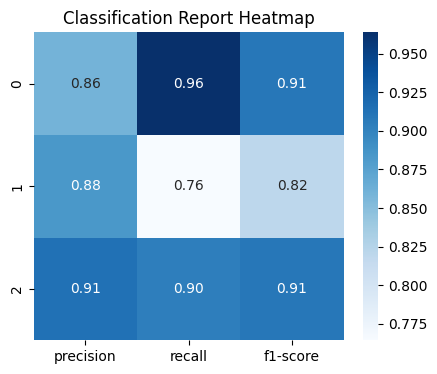

Logistic Regression Classification Report with TF-IDF


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Accuracy: 81.81 %
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.97      0.90       858
           1       0.77      0.64      0.70       700
           2       0.83      0.81      0.82       833

    accuracy                           0.82      2391
   macro avg       0.81      0.81      0.81      2391
weighted avg       0.81      0.82      0.81      2391



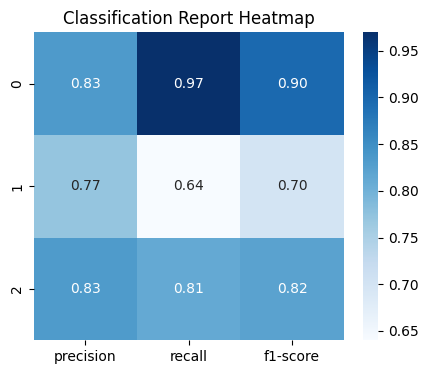

Logistic Regression Classification Report with GloVe
Accuracy: 76.98 %
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.70      0.72      1075
           1       0.73      0.73      0.73       895
           2       0.82      0.88      0.85      1019

    accuracy                           0.77      2989
   macro avg       0.77      0.77      0.77      2989
weighted avg       0.77      0.77      0.77      2989



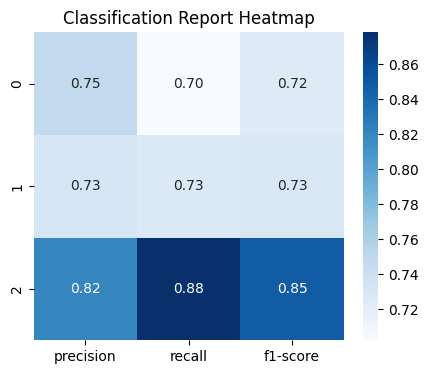

Logistic Regression Classification Report with Word2Vec


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Accuracy: 70.02 %
Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.59      0.62      1075
           1       0.73      0.63      0.68       895
           2       0.73      0.87      0.79      1019

    accuracy                           0.70      2989
   macro avg       0.70      0.70      0.70      2989
weighted avg       0.70      0.70      0.70      2989



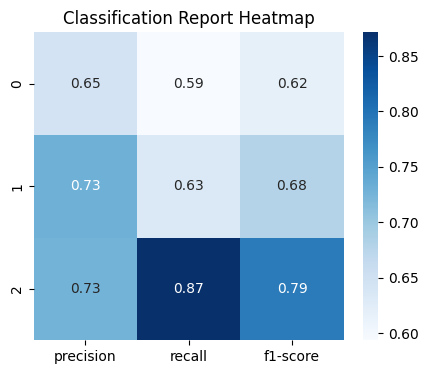

In [ ]:
print("Solver : 'sag' and Penalty : None")
print("Logistic Regression Classification Report with BoW")
logistic_regression_classifier(X_train_bow, X_test_bow, y_train, y_test, 'sag', None)
print("Logistic Regression Classification Report with TF-IDF")
logistic_regression_classifier(X_train_tfidf, X_test_tfidf, y_train, y_test, 'sag', None)
print("Logistic Regression Classification Report with GloVe")
logistic_regression_classifier(X_train_glove, X_test_glove, y_train_glove, y_test_glove, 'sag', None)
print("Logistic Regression Classification Report with Word2Vec")
logistic_regression_classifier(X_train_w2v, X_test_w2v, y_train_w2v, y_test_w2v, 'sag', None)

#### With Regularization

Solver : 'sag' and Penalty : 'l2'
Logistic Regression Classification Report with BoW
Accuracy: 88.96 %
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.92      0.89       858
           1       0.89      0.79      0.84       700
           2       0.91      0.95      0.93       833

    accuracy                           0.89      2391
   macro avg       0.89      0.88      0.89      2391
weighted avg       0.89      0.89      0.89      2391



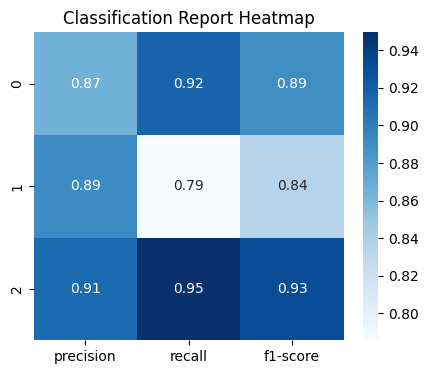

Logistic Regression Classification Report with TF-IDF
Accuracy: 85.70 %
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.85      0.85       858
           1       0.83      0.77      0.80       700
           2       0.89      0.94      0.91       833

    accuracy                           0.86      2391
   macro avg       0.85      0.85      0.85      2391
weighted avg       0.86      0.86      0.86      2391



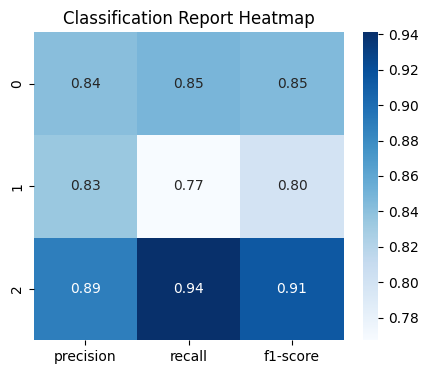

Logistic Regression Classification Report with GloVe
Accuracy: 77.15 %
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.70      0.72      1075
           1       0.74      0.73      0.73       895
           2       0.82      0.88      0.85      1019

    accuracy                           0.77      2989
   macro avg       0.77      0.77      0.77      2989
weighted avg       0.77      0.77      0.77      2989



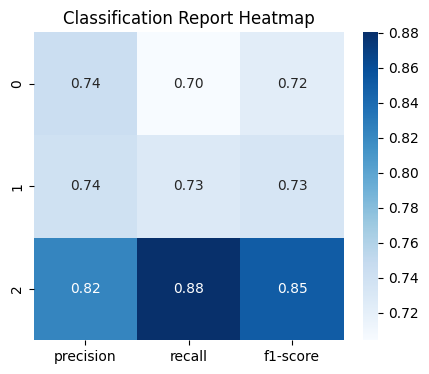

Logistic Regression Classification Report with Word2Vec
Accuracy: 59.79 %
Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.45      0.49      1075
           1       0.67      0.49      0.57       895
           2       0.61      0.84      0.71      1019

    accuracy                           0.60      2989
   macro avg       0.60      0.60      0.59      2989
weighted avg       0.60      0.60      0.59      2989



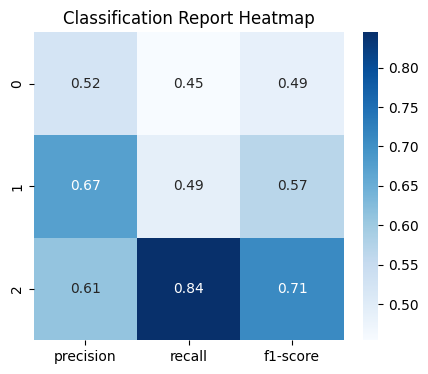

In [ ]:
print("Solver : 'sag' and Penalty : 'l2'")
print("Logistic Regression Classification Report with BoW")
logistic_regression_classifier(X_train_bow, X_test_bow, y_train, y_test, 'sag', 'l2')
print("Logistic Regression Classification Report with TF-IDF")
logistic_regression_classifier(X_train_tfidf, X_test_tfidf, y_train, y_test, 'sag', 'l2')
print("Logistic Regression Classification Report with GloVe")
logistic_regression_classifier(X_train_glove, X_test_glove, y_train_glove, y_test_glove, 'sag', 'l2')
print("Logistic Regression Classification Report with Word2Vec")
logistic_regression_classifier(X_train_w2v, X_test_w2v, y_train_w2v, y_test_w2v, 'sag', 'l2')

### Solver : ‘saga’ and Penalty : 'l1'

#### Without Regularization

Solver : 'saga' and Penalty : 'None'
Logistic Regression Classification Report with BoW


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Accuracy: 89.34 %
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.96      0.91       858
           1       0.90      0.78      0.84       700
           2       0.92      0.91      0.92       833

    accuracy                           0.89      2391
   macro avg       0.89      0.89      0.89      2391
weighted avg       0.89      0.89      0.89      2391



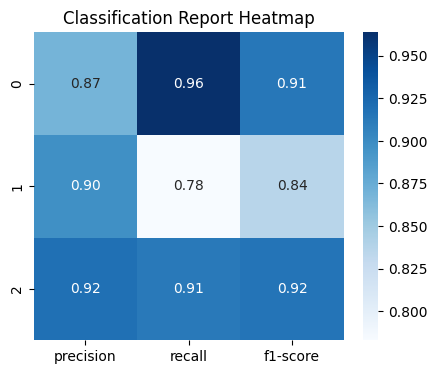

Logistic Regression Classification Report with TF-IDF


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Accuracy: 82.69 %
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.97      0.89       858
           1       0.79      0.66      0.72       700
           2       0.85      0.82      0.84       833

    accuracy                           0.83      2391
   macro avg       0.82      0.82      0.82      2391
weighted avg       0.83      0.83      0.82      2391



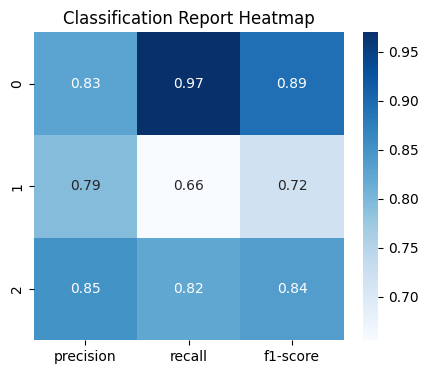

Logistic Regression Classification Report with GloVe
Accuracy: 76.98 %
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.70      0.72      1075
           1       0.73      0.73      0.73       895
           2       0.82      0.88      0.85      1019

    accuracy                           0.77      2989
   macro avg       0.77      0.77      0.77      2989
weighted avg       0.77      0.77      0.77      2989



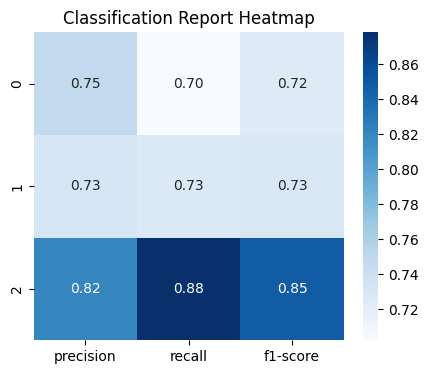

Logistic Regression Classification Report with Word2Vec


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Accuracy: 69.39 %
Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.59      0.61      1075
           1       0.73      0.62      0.67       895
           2       0.71      0.87      0.79      1019

    accuracy                           0.69      2989
   macro avg       0.69      0.69      0.69      2989
weighted avg       0.69      0.69      0.69      2989



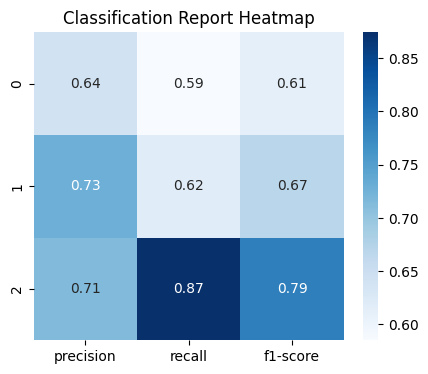

In [ ]:
print("Solver : 'saga' and Penalty : 'None'")
print("Logistic Regression Classification Report with BoW")
logistic_regression_classifier(X_train_bow, X_test_bow, y_train, y_test, 'saga', None)
print("Logistic Regression Classification Report with TF-IDF")
logistic_regression_classifier(X_train_tfidf, X_test_tfidf, y_train, y_test, 'saga', None)
print("Logistic Regression Classification Report with GloVe")
logistic_regression_classifier(X_train_glove, X_test_glove, y_train_glove, y_test_glove, 'saga', None)
print("Logistic Regression Classification Report with Word2Vec")
logistic_regression_classifier(X_train_w2v, X_test_w2v, y_train_w2v, y_test_w2v, 'saga', None)

#### With Regularization

Solver : 'saga' and Penalty : 'l1'
Logistic Regression Classification Report with BoW


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Accuracy: 86.32 %
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.86      0.85       858
           1       0.85      0.77      0.81       700
           2       0.89      0.94      0.91       833

    accuracy                           0.86      2391
   macro avg       0.86      0.86      0.86      2391
weighted avg       0.86      0.86      0.86      2391



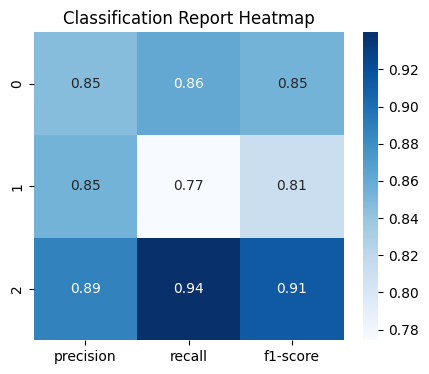

Logistic Regression Classification Report with TF-IDF
Accuracy: 82.73 %
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.78      0.80       858
           1       0.80      0.75      0.77       700
           2       0.86      0.94      0.90       833

    accuracy                           0.83      2391
   macro avg       0.82      0.82      0.82      2391
weighted avg       0.83      0.83      0.83      2391



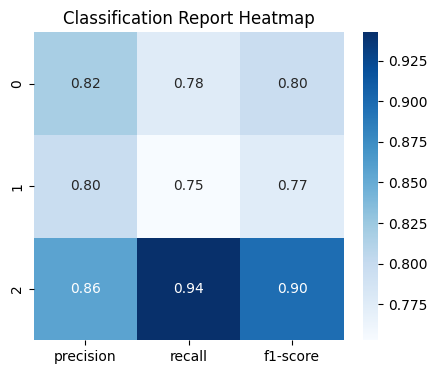

Logistic Regression Classification Report with GloVe
Accuracy: 76.78 %
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.70      0.72      1075
           1       0.74      0.72      0.73       895
           2       0.82      0.88      0.85      1019

    accuracy                           0.77      2989
   macro avg       0.77      0.77      0.77      2989
weighted avg       0.77      0.77      0.77      2989



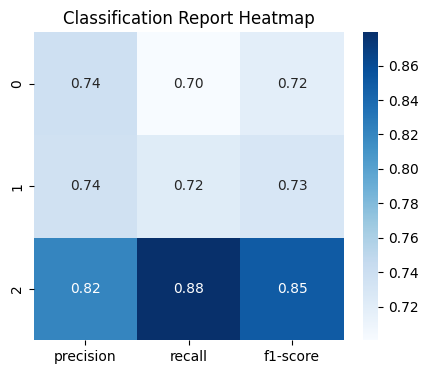

Logistic Regression Classification Report with Word2Vec


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Accuracy: 67.75 %
Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.57      0.60      1075
           1       0.73      0.59      0.65       895
           2       0.69      0.87      0.77      1019

    accuracy                           0.68      2989
   macro avg       0.68      0.68      0.67      2989
weighted avg       0.68      0.68      0.67      2989



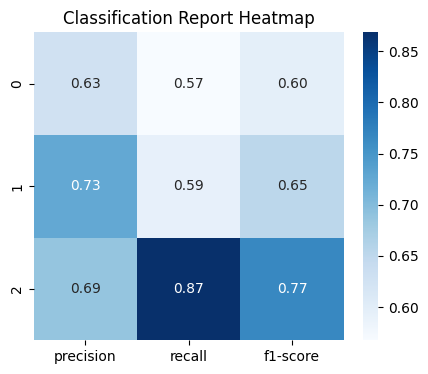

In [ ]:
print("Solver : 'saga' and Penalty : 'l1'")
print("Logistic Regression Classification Report with BoW")
logistic_regression_classifier(X_train_bow, X_test_bow, y_train, y_test, 'saga', 'l1')
print("Logistic Regression Classification Report with TF-IDF")
logistic_regression_classifier(X_train_tfidf, X_test_tfidf, y_train, y_test, 'saga', 'l1')
print("Logistic Regression Classification Report with GloVe")
logistic_regression_classifier(X_train_glove, X_test_glove, y_train_glove, y_test_glove, 'saga', 'l1')
print("Logistic Regression Classification Report with Word2Vec")
logistic_regression_classifier(X_train_w2v, X_test_w2v, y_train_w2v, y_test_w2v, 'saga', 'l1')

### Solver : ‘saga’ and Penalty : 'l2'

#### Without Regularization

Solver : 'saga' and Penalty : None
Logistic Regression Classification Report with BoW


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Accuracy: 89.34 %
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.96      0.91       858
           1       0.90      0.78      0.84       700
           2       0.92      0.91      0.92       833

    accuracy                           0.89      2391
   macro avg       0.89      0.89      0.89      2391
weighted avg       0.89      0.89      0.89      2391



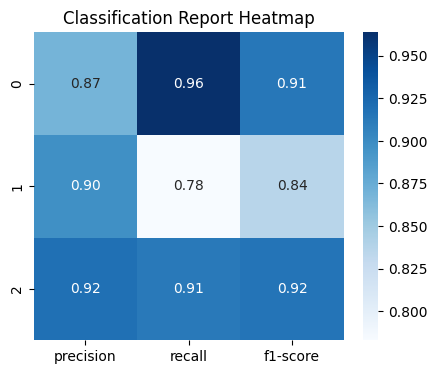

Logistic Regression Classification Report with TF-IDF


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Accuracy: 82.69 %
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.97      0.89       858
           1       0.79      0.66      0.72       700
           2       0.85      0.82      0.84       833

    accuracy                           0.83      2391
   macro avg       0.82      0.82      0.82      2391
weighted avg       0.83      0.83      0.82      2391



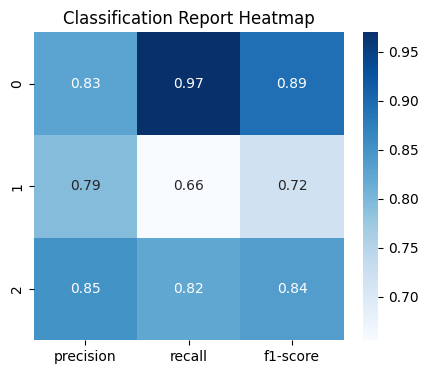

Logistic Regression Classification Report with GloVe
Accuracy: 76.98 %
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.70      0.72      1075
           1       0.73      0.73      0.73       895
           2       0.82      0.88      0.85      1019

    accuracy                           0.77      2989
   macro avg       0.77      0.77      0.77      2989
weighted avg       0.77      0.77      0.77      2989



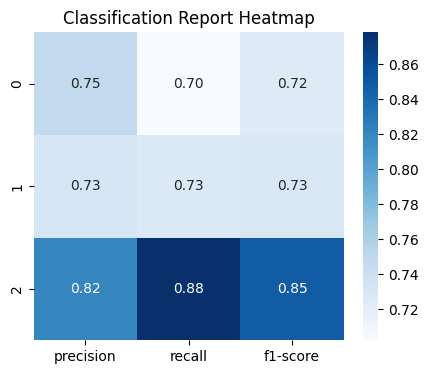

Logistic Regression Classification Report with Word2Vec


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Accuracy: 69.39 %
Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.59      0.61      1075
           1       0.73      0.62      0.67       895
           2       0.71      0.87      0.79      1019

    accuracy                           0.69      2989
   macro avg       0.69      0.69      0.69      2989
weighted avg       0.69      0.69      0.69      2989



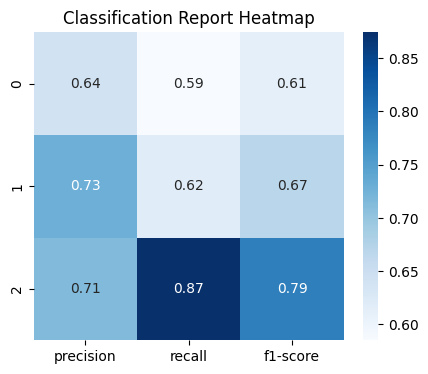

In [ ]:
print("Solver : 'saga' and Penalty : None")
print("Logistic Regression Classification Report with BoW")
logistic_regression_classifier(X_train_bow, X_test_bow, y_train, y_test, 'saga', None)
print("Logistic Regression Classification Report with TF-IDF")
logistic_regression_classifier(X_train_tfidf, X_test_tfidf, y_train, y_test, 'saga', None)
print("Logistic Regression Classification Report with GloVe")
logistic_regression_classifier(X_train_glove, X_test_glove, y_train_glove, y_test_glove, 'saga', None)
print("Logistic Regression Classification Report with Word2Vec")
logistic_regression_classifier(X_train_w2v, X_test_w2v, y_train_w2v, y_test_w2v, 'saga', None)

#### With Regularization

Solver : 'saga' and Penalty : 'l2'
Logistic Regression Classification Report with BoW
Accuracy: 89.08 %
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.92      0.89       858
           1       0.89      0.79      0.84       700
           2       0.92      0.95      0.93       833

    accuracy                           0.89      2391
   macro avg       0.89      0.88      0.89      2391
weighted avg       0.89      0.89      0.89      2391



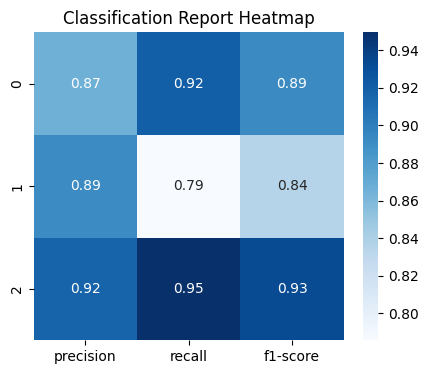

Logistic Regression Classification Report with TF-IDF
Accuracy: 85.70 %
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.85      0.85       858
           1       0.83      0.77      0.80       700
           2       0.89      0.94      0.91       833

    accuracy                           0.86      2391
   macro avg       0.85      0.85      0.85      2391
weighted avg       0.86      0.86      0.86      2391



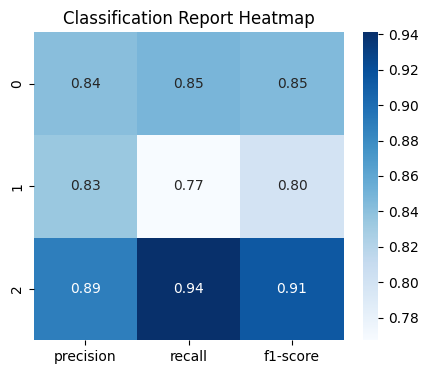

Logistic Regression Classification Report with GloVe
Accuracy: 77.15 %
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.70      0.72      1075
           1       0.74      0.73      0.73       895
           2       0.82      0.88      0.85      1019

    accuracy                           0.77      2989
   macro avg       0.77      0.77      0.77      2989
weighted avg       0.77      0.77      0.77      2989



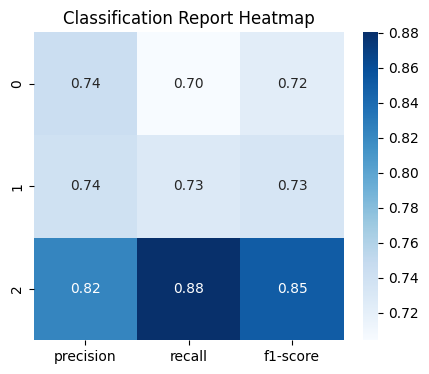

Logistic Regression Classification Report with Word2Vec
Accuracy: 59.79 %
Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.45      0.49      1075
           1       0.67      0.49      0.57       895
           2       0.61      0.84      0.71      1019

    accuracy                           0.60      2989
   macro avg       0.60      0.60      0.59      2989
weighted avg       0.60      0.60      0.59      2989



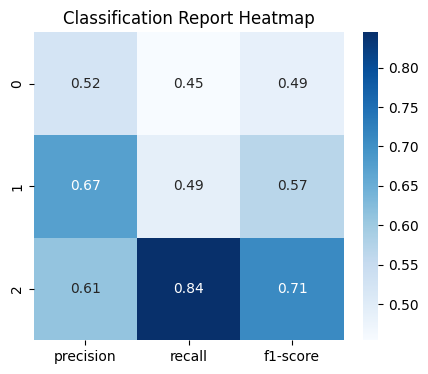

In [ ]:
print("Solver : 'saga' and Penalty : 'l2'")
print("Logistic Regression Classification Report with BoW")
logistic_regression_classifier(X_train_bow, X_test_bow, y_train, y_test, 'saga', 'l2')
print("Logistic Regression Classification Report with TF-IDF")
logistic_regression_classifier(X_train_tfidf, X_test_tfidf, y_train, y_test, 'saga', 'l2')
print("Logistic Regression Classification Report with GloVe")
logistic_regression_classifier(X_train_glove, X_test_glove, y_train_glove, y_test_glove, 'saga', 'l2')
print("Logistic Regression Classification Report with Word2Vec")
logistic_regression_classifier(X_train_w2v, X_test_w2v, y_train_w2v, y_test_w2v, 'saga', 'l2')

### Solver : ‘saga’ and Penalty : 'elasticnet'

#### Without Regularization

Solver : 'saga' and Penalty : None
Logistic Regression Classification Report with BoW


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=None)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Accuracy: 89.34 %
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.96      0.91       858
           1       0.90      0.78      0.84       700
           2       0.92      0.91      0.92       833

    accuracy                           0.89      2391
   macro avg       0.89      0.89      0.89      2391
weighted avg       0.89      0.89      0.89      2391



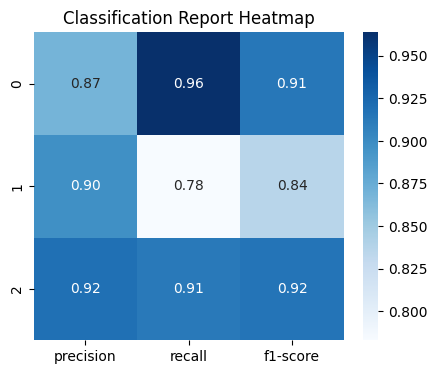

Logistic Regression Classification Report with TF-IDF


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=None)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Accuracy: 82.69 %
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.97      0.89       858
           1       0.79      0.66      0.72       700
           2       0.85      0.82      0.84       833

    accuracy                           0.83      2391
   macro avg       0.82      0.82      0.82      2391
weighted avg       0.83      0.83      0.82      2391



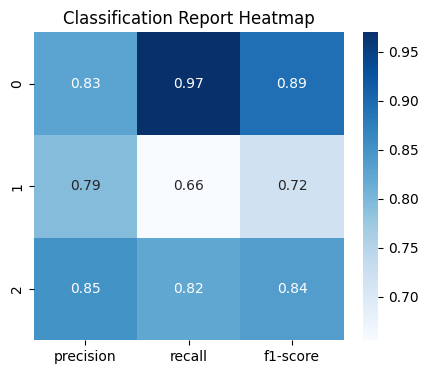

Logistic Regression Classification Report with GloVe


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=None)
  warnings.warn(


Accuracy: 76.98 %
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.70      0.72      1075
           1       0.73      0.73      0.73       895
           2       0.82      0.88      0.85      1019

    accuracy                           0.77      2989
   macro avg       0.77      0.77      0.77      2989
weighted avg       0.77      0.77      0.77      2989



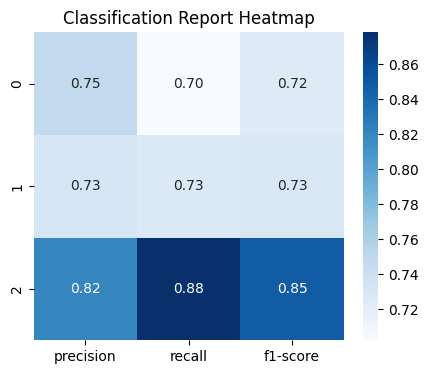

Logistic Regression Classification Report with Word2Vec


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Accuracy: 69.39 %
Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.59      0.61      1075
           1       0.73      0.62      0.67       895
           2       0.71      0.87      0.79      1019

    accuracy                           0.69      2989
   macro avg       0.69      0.69      0.69      2989
weighted avg       0.69      0.69      0.69      2989



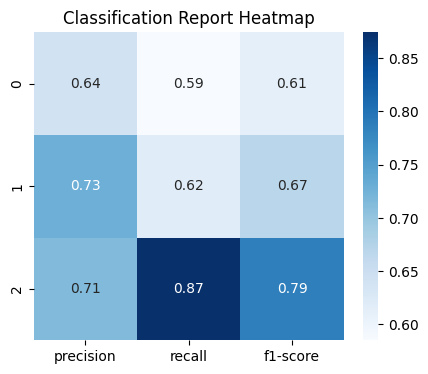

In [ ]:
print("Solver : 'saga' and Penalty : None")
print("Logistic Regression Classification Report with BoW")
logistic_regression_classifier(X_train_bow, X_test_bow, y_train, y_test, 'saga', None, 0.5)
print("Logistic Regression Classification Report with TF-IDF")
logistic_regression_classifier(X_train_tfidf, X_test_tfidf, y_train, y_test, 'saga', None, 0.5)
print("Logistic Regression Classification Report with GloVe")
logistic_regression_classifier(X_train_glove, X_test_glove, y_train_glove, y_test_glove, 'saga', None, 0.5)
print("Logistic Regression Classification Report with Word2Vec")
logistic_regression_classifier(X_train_w2v, X_test_w2v, y_train_w2v, y_test_w2v, 'saga', None)

#### With Regularization

Solver : 'saga' and Penalty : 'elasticnet'
Logistic Regression Classification Report with BoW
Accuracy: 87.75 %
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.89      0.87       858
           1       0.87      0.79      0.83       700
           2       0.90      0.94      0.92       833

    accuracy                           0.88      2391
   macro avg       0.88      0.87      0.87      2391
weighted avg       0.88      0.88      0.88      2391



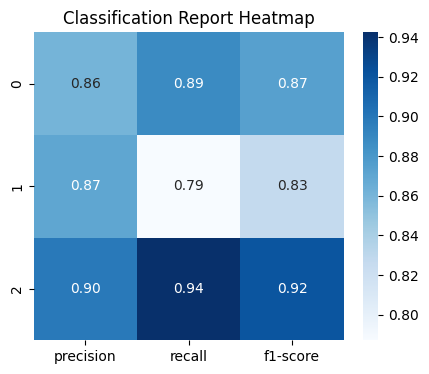

Logistic Regression Classification Report with TF-IDF
Accuracy: 84.15 %
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.81      0.82       858
           1       0.81      0.76      0.78       700
           2       0.88      0.94      0.91       833

    accuracy                           0.84      2391
   macro avg       0.84      0.84      0.84      2391
weighted avg       0.84      0.84      0.84      2391



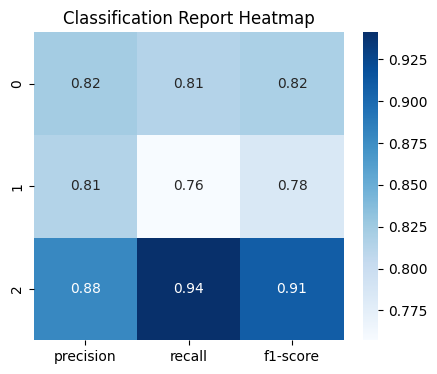

Logistic Regression Classification Report with GloVe
Accuracy: 76.92 %
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.70      0.72      1075
           1       0.73      0.73      0.73       895
           2       0.82      0.88      0.85      1019

    accuracy                           0.77      2989
   macro avg       0.77      0.77      0.77      2989
weighted avg       0.77      0.77      0.77      2989



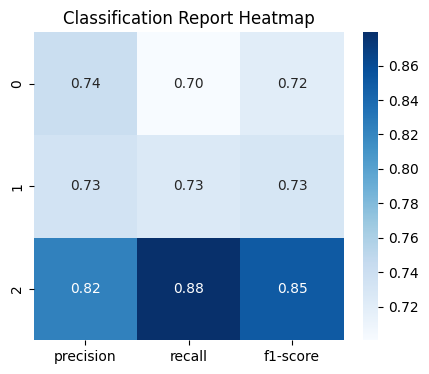

Logistic Regression Classification Report with Word2Vec
Accuracy: 62.36 %
Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.47      0.51      1075
           1       0.69      0.53      0.60       895
           2       0.63      0.87      0.73      1019

    accuracy                           0.62      2989
   macro avg       0.63      0.62      0.61      2989
weighted avg       0.62      0.62      0.61      2989



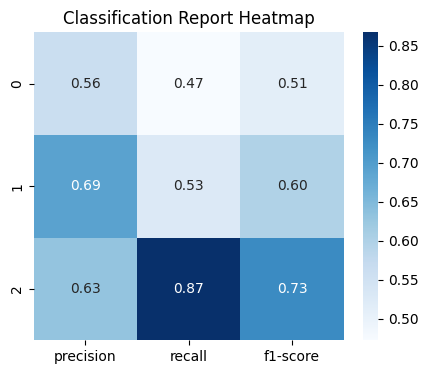

In [ ]:
print("Solver : 'saga' and Penalty : 'elasticnet'")
print("Logistic Regression Classification Report with BoW")
logistic_regression_classifier(X_train_bow, X_test_bow, y_train, y_test, 'saga', 'elasticnet', 0.5)
print("Logistic Regression Classification Report with TF-IDF")
logistic_regression_classifier(X_train_tfidf, X_test_tfidf, y_train, y_test, 'saga', 'elasticnet', 0.5)
print("Logistic Regression Classification Report with GloVe")
logistic_regression_classifier(X_train_glove, X_test_glove, y_train_glove, y_test_glove, 'saga', 'elasticnet', 0.5)
print("Logistic Regression Classification Report with Word2Vec")
logistic_regression_classifier(X_train_w2v, X_test_w2v, y_train_w2v, y_test_w2v, 'saga', 'elasticnet', 0.5)

### Solver : ‘lbfgs’ and Penalty : 'l2'

#### Without Regularization

Solver : 'lbfgs' and Penalty : None
Logistic Regression Classification Report with BoW
Accuracy: 87.33 %
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.97      0.90       858
           1       0.87      0.74      0.80       700
           2       0.91      0.88      0.89       833

    accuracy                           0.87      2391
   macro avg       0.88      0.87      0.87      2391
weighted avg       0.87      0.87      0.87      2391



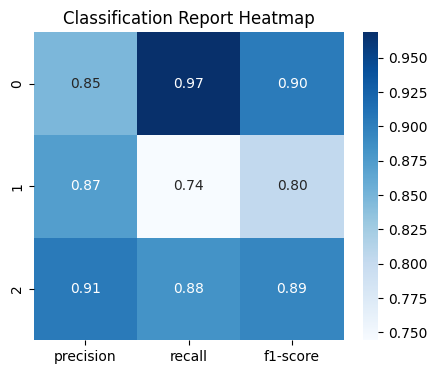

Logistic Regression Classification Report with TF-IDF
Accuracy: 84.23 %
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.96      0.89       858
           1       0.82      0.69      0.75       700
           2       0.87      0.85      0.86       833

    accuracy                           0.84      2391
   macro avg       0.84      0.83      0.83      2391
weighted avg       0.84      0.84      0.84      2391



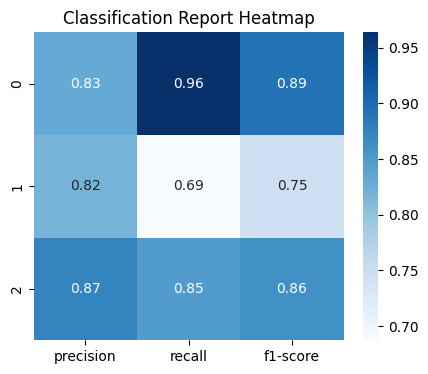

Logistic Regression Classification Report with GloVe
Accuracy: 76.98 %
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.70      0.72      1075
           1       0.73      0.73      0.73       895
           2       0.82      0.88      0.85      1019

    accuracy                           0.77      2989
   macro avg       0.77      0.77      0.77      2989
weighted avg       0.77      0.77      0.77      2989



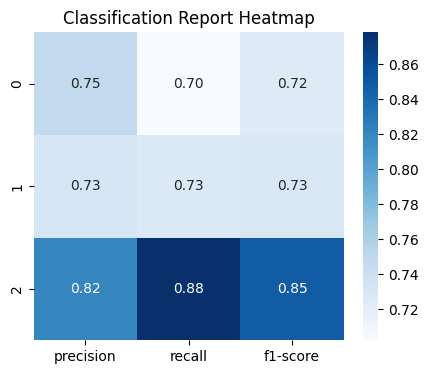

Logistic Regression Classification Report with Word2Vec
Accuracy: 70.16 %
Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.59      0.62      1075
           1       0.73      0.64      0.69       895
           2       0.73      0.87      0.79      1019

    accuracy                           0.70      2989
   macro avg       0.70      0.70      0.70      2989
weighted avg       0.70      0.70      0.70      2989



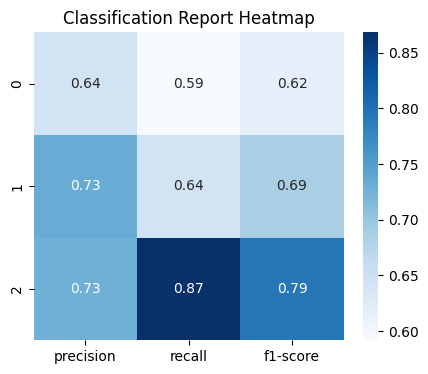

In [ ]:
print("Solver : 'lbfgs' and Penalty : None")
print("Logistic Regression Classification Report with BoW")
logistic_regression_classifier(X_train_bow, X_test_bow, y_train, y_test, 'lbfgs', None)
print("Logistic Regression Classification Report with TF-IDF")
logistic_regression_classifier(X_train_tfidf, X_test_tfidf, y_train, y_test, 'lbfgs', None)
print("Logistic Regression Classification Report with GloVe")
logistic_regression_classifier(X_train_glove, X_test_glove, y_train_glove, y_test_glove, 'lbfgs', None)
print("Logistic Regression Classification Report with Word2Vec")
logistic_regression_classifier(X_train_w2v, X_test_w2v, y_train_w2v, y_test_w2v, 'lbfgs', None)

#### With Regularization

Solver : 'lbfgs' and Penalty : 'l2'
Logistic Regression Classification Report with BoW
Accuracy: 88.87 %
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.92      0.89       858
           1       0.89      0.78      0.83       700
           2       0.91      0.95      0.93       833

    accuracy                           0.89      2391
   macro avg       0.89      0.88      0.88      2391
weighted avg       0.89      0.89      0.89      2391



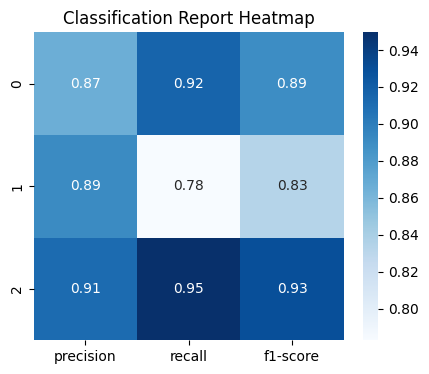

Logistic Regression Classification Report with TF-IDF
Accuracy: 85.70 %
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.85      0.84       858
           1       0.84      0.77      0.80       700
           2       0.89      0.94      0.91       833

    accuracy                           0.86      2391
   macro avg       0.85      0.85      0.85      2391
weighted avg       0.86      0.86      0.86      2391



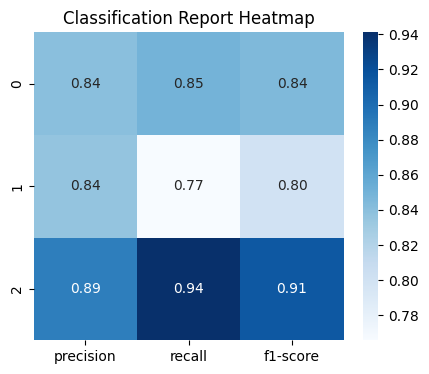

Logistic Regression Classification Report with GloVe
Accuracy: 77.15 %
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.70      0.72      1075
           1       0.74      0.73      0.73       895
           2       0.82      0.88      0.85      1019

    accuracy                           0.77      2989
   macro avg       0.77      0.77      0.77      2989
weighted avg       0.77      0.77      0.77      2989



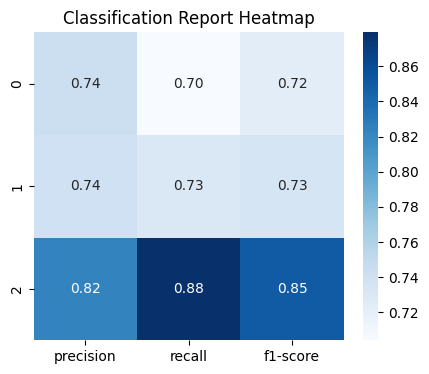

Logistic Regression Classification Report with Word2Vec
Accuracy: 59.92 %
Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.46      0.49      1075
           1       0.68      0.49      0.57       895
           2       0.61      0.84      0.71      1019

    accuracy                           0.60      2989
   macro avg       0.61      0.60      0.59      2989
weighted avg       0.60      0.60      0.59      2989



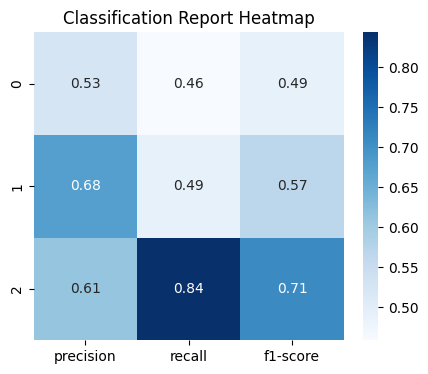

In [ ]:
print("Solver : 'lbfgs' and Penalty : 'l2'")
print("Logistic Regression Classification Report with BoW")
logistic_regression_classifier(X_train_bow, X_test_bow, y_train, y_test, 'lbfgs', 'l2')
print("Logistic Regression Classification Report with TF-IDF")
logistic_regression_classifier(X_train_tfidf, X_test_tfidf, y_train, y_test, 'lbfgs', 'l2')
print("Logistic Regression Classification Report with GloVe")
logistic_regression_classifier(X_train_glove, X_test_glove, y_train_glove, y_test_glove, 'lbfgs', 'l2')
print("Logistic Regression Classification Report with Word2Vec")
logistic_regression_classifier(X_train_w2v, X_test_w2v, y_train_w2v, y_test_w2v, 'lbfgs', 'l2')

# SVM

In [ ]:
from sklearn import svm
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV

In [ ]:
def svm_classifier(X_train, X_test, y_train, y_test, shape, kernel, C):
  svm_model = svm.SVC(decision_function_shape=shape, kernel=kernel, degree=3, C=1)
  svm_model.fit(X_train, y_train)
  y_pred = svm_model.predict(X_test)

  svm_acc = accuracy_score(y_test, y_pred)
  svm_f1 = f1_score(y_test, y_pred, average='weighted')
  print('Accuracy of One vs One Polynomial Kernel: ', "%.2f" % (svm_acc * 100), "%")
  print(classification_report(y_test, y_pred))
  plot_heatmap(y_test, y_pred)

## One Vs One

### Poly kernel

Poly Kernel

SVM Classification Report with BoW
Accuracy of One vs One Polynomial Kernel:  81.05 %
              precision    recall  f1-score   support

           0       0.94      0.74      0.83       858
           1       0.91      0.68      0.78       700
           2       0.70      0.99      0.82       833

    accuracy                           0.81      2391
   macro avg       0.85      0.80      0.81      2391
weighted avg       0.84      0.81      0.81      2391



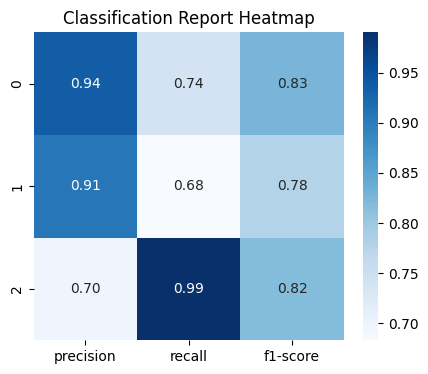


SVM Classification Report with TF-IDF
Accuracy of One vs One Polynomial Kernel:  88.92 %
              precision    recall  f1-score   support

           0       0.96      0.95      0.96       858
           1       0.90      0.74      0.81       700
           2       0.82      0.95      0.88       833

    accuracy                           0.89      2391
   macro avg       0.89      0.88      0.88      2391
weighted avg       0.89      0.89      0.89      2391



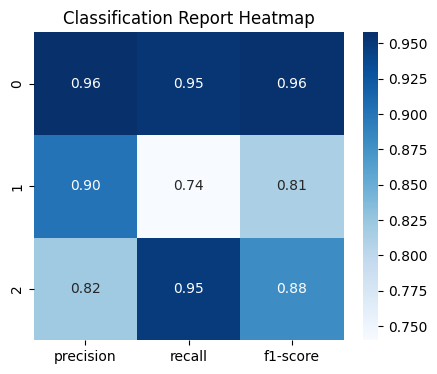


SVM Classification Report with GloVe
Accuracy of One vs One Polynomial Kernel:  80.03 %
              precision    recall  f1-score   support

           0       0.78      0.76      0.77      1075
           1       0.80      0.72      0.76       895
           2       0.83      0.91      0.87      1019

    accuracy                           0.80      2989
   macro avg       0.80      0.80      0.80      2989
weighted avg       0.80      0.80      0.80      2989



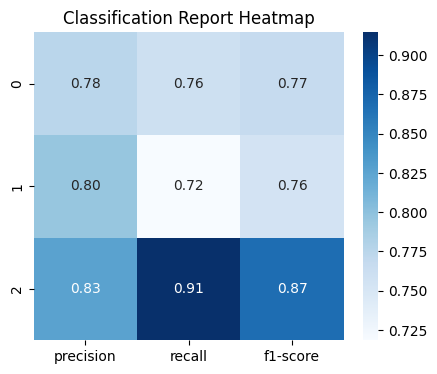


SVM Classification Report with Word2Vec
Accuracy of One vs One Polynomial Kernel:  46.84 %
              precision    recall  f1-score   support

           0       0.44      0.32      0.37      1075
           1       0.64      0.15      0.24       895
           2       0.46      0.91      0.61      1019

    accuracy                           0.47      2989
   macro avg       0.51      0.46      0.41      2989
weighted avg       0.51      0.47      0.41      2989



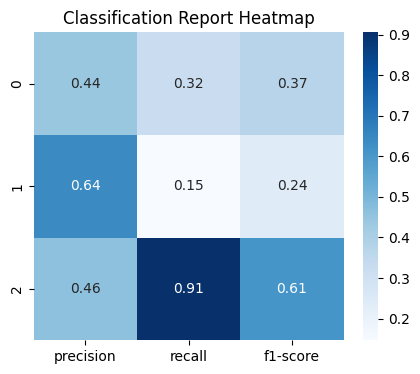

In [ ]:
print("Poly Kernel")
print("\nSVM Classification Report with BoW")
svm_classifier(X_train_bow, X_test_bow, y_train, y_test, 'ovo', 'poly', 1)
print("\nSVM Classification Report with TF-IDF")
svm_classifier(X_train_tfidf, X_test_tfidf, y_train, y_test, 'ovo', 'poly', 1)
print("\nSVM Classification Report with GloVe")
svm_classifier(X_train_glove, X_test_glove, y_train_glove, y_test_glove, 'ovo', 'poly', 1)
print("\nSVM Classification Report with Word2Vec")
svm_classifier(X_train_w2v, X_test_w2v, y_train_w2v, y_test_w2v, 'ovo', 'poly', 1)

### RBF Kernel

RBF Kernel

SVM Classification Report with BoW
Accuracy of One vs One Polynomial Kernel:  88.37 %
              precision    recall  f1-score   support

           0       0.87      0.90      0.89       858
           1       0.89      0.77      0.83       700
           2       0.89      0.96      0.92       833

    accuracy                           0.88      2391
   macro avg       0.88      0.88      0.88      2391
weighted avg       0.88      0.88      0.88      2391



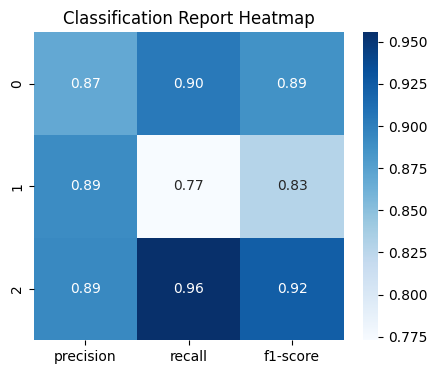




SVM Classification Report with TF-IDF
Accuracy of One vs One Polynomial Kernel:  90.59 %
              precision    recall  f1-score   support

           0       0.89      0.94      0.92       858
           1       0.91      0.80      0.85       700
           2       0.92      0.95      0.93       833

    accuracy                           0.91      2391
   macro avg       0.91      0.90      0.90      2391
weighted avg       0.91      0.91      0.90      2391



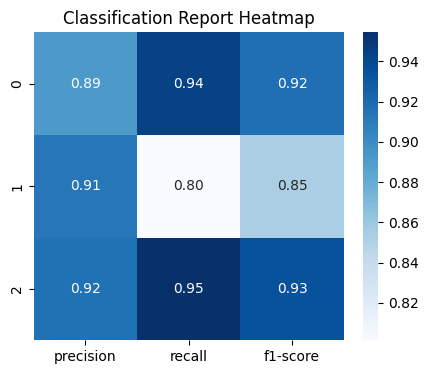




SVM Classification Report with GloVe
Accuracy of One vs One Polynomial Kernel:  80.50 %
              precision    recall  f1-score   support

           0       0.80      0.75      0.77      1075
           1       0.78      0.76      0.77       895
           2       0.83      0.91      0.87      1019

    accuracy                           0.80      2989
   macro avg       0.80      0.80      0.80      2989
weighted avg       0.80      0.80      0.80      2989



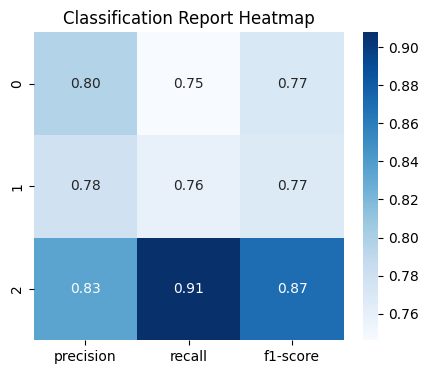




SVM Classification Report with Word2Vec
Accuracy of One vs One Polynomial Kernel:  46.91 %
              precision    recall  f1-score   support

           0       0.41      0.49      0.44      1075
           1       0.51      0.31      0.38       895
           2       0.52      0.59      0.55      1019

    accuracy                           0.47      2989
   macro avg       0.48      0.46      0.46      2989
weighted avg       0.48      0.47      0.46      2989



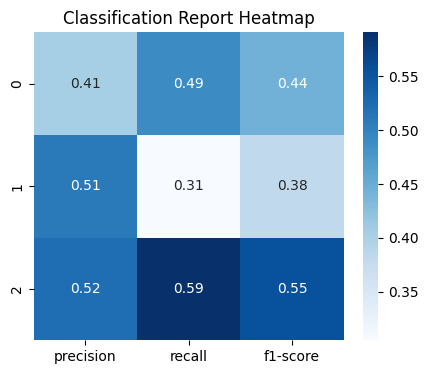

In [ ]:
print("RBF Kernel")
print("\nSVM Classification Report with BoW")
svm_classifier(X_train_bow, X_test_bow, y_train, y_test, 'ovo', 'rbf', 1)
print("\n\n\nSVM Classification Report with TF-IDF")
svm_classifier(X_train_tfidf, X_test_tfidf, y_train, y_test, 'ovo', 'rbf', 1)
print("\n\n\nSVM Classification Report with GloVe")
svm_classifier(X_train_glove, X_test_glove, y_train_glove, y_test_glove, 'ovo', 'rbf', 1)
print("\n\n\nSVM Classification Report with Word2Vec")
svm_classifier(X_train_w2v, X_test_w2v, y_train_w2v, y_test_w2v, 'ovo', 'rbf', 1)

### Sigmoid kernel

RBF Kernel

SVM Classification Report with BoW
Accuracy of One vs One Polynomial Kernel:  81.18 %
              precision    recall  f1-score   support

           0       0.80      0.76      0.78       858
           1       0.76      0.73      0.75       700
           2       0.86      0.93      0.90       833

    accuracy                           0.81      2391
   macro avg       0.81      0.81      0.81      2391
weighted avg       0.81      0.81      0.81      2391



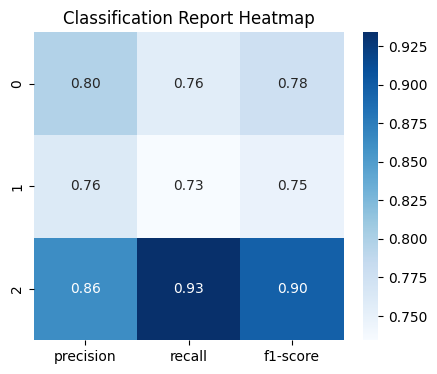


SVM Classification Report with TF-IDF
Accuracy of One vs One Polynomial Kernel:  84.23 %
              precision    recall  f1-score   support

           0       0.82      0.82      0.82       858
           1       0.82      0.75      0.78       700
           2       0.89      0.94      0.91       833

    accuracy                           0.84      2391
   macro avg       0.84      0.84      0.84      2391
weighted avg       0.84      0.84      0.84      2391



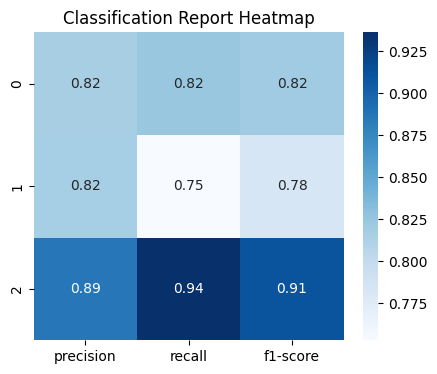


SVM Classification Report with GloVe
Accuracy of One vs One Polynomial Kernel:  61.06 %
              precision    recall  f1-score   support

           0       0.53      0.60      0.56      1075
           1       0.54      0.55      0.54       895
           2       0.81      0.68      0.74      1019

    accuracy                           0.61      2989
   macro avg       0.62      0.61      0.61      2989
weighted avg       0.63      0.61      0.62      2989



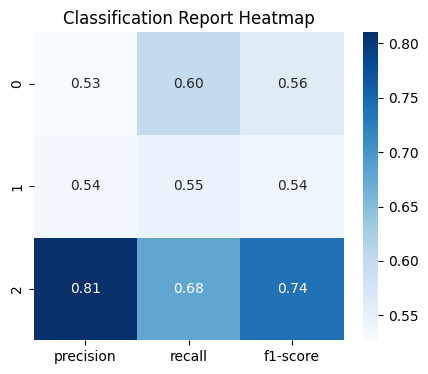


SVM Classification Report with Word2Vec
Accuracy of One vs One Polynomial Kernel:  34.16 %
              precision    recall  f1-score   support

           0       0.39      0.50      0.44      1075
           1       0.26      0.40      0.31       895
           2       0.60      0.13      0.21      1019

    accuracy                           0.34      2989
   macro avg       0.41      0.34      0.32      2989
weighted avg       0.42      0.34      0.32      2989



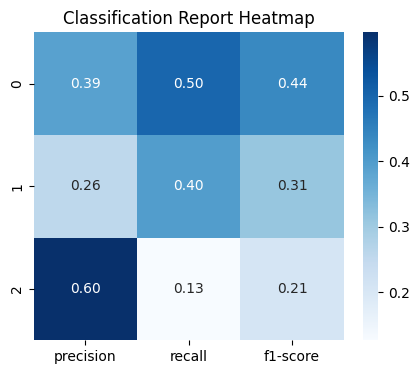

In [ ]:
print("RBF Kernel")
print("\nSVM Classification Report with BoW")
svm_classifier(X_train_bow, X_test_bow, y_train, y_test, 'ovo', 'sigmoid', 1)
print("\nSVM Classification Report with TF-IDF")
svm_classifier(X_train_tfidf, X_test_tfidf, y_train, y_test, 'ovo', 'sigmoid', 1)
print("\nSVM Classification Report with GloVe")
svm_classifier(X_train_glove, X_test_glove, y_train_glove, y_test_glove, 'ovo', 'sigmoid', 1)
print("\nSVM Classification Report with Word2Vec")
svm_classifier(X_train_w2v, X_test_w2v, y_train_w2v, y_test_w2v, 'ovo', 'sigmoid', 1)

## One Vs Rest

### Poly Kernel

Poly Kernel

SVM Classification Report with BoW
Accuracy of One vs One Polynomial Kernel:  81.05 %
              precision    recall  f1-score   support

           0       0.94      0.74      0.83       858
           1       0.91      0.68      0.78       700
           2       0.70      0.99      0.82       833

    accuracy                           0.81      2391
   macro avg       0.85      0.80      0.81      2391
weighted avg       0.84      0.81      0.81      2391



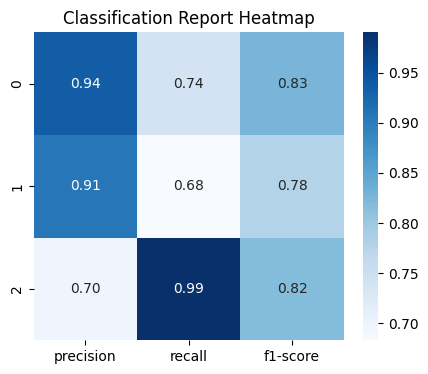


SVM Classification Report with TF-IDF
Accuracy of One vs One Polynomial Kernel:  88.92 %
              precision    recall  f1-score   support

           0       0.96      0.95      0.96       858
           1       0.90      0.74      0.81       700
           2       0.82      0.95      0.88       833

    accuracy                           0.89      2391
   macro avg       0.89      0.88      0.88      2391
weighted avg       0.89      0.89      0.89      2391



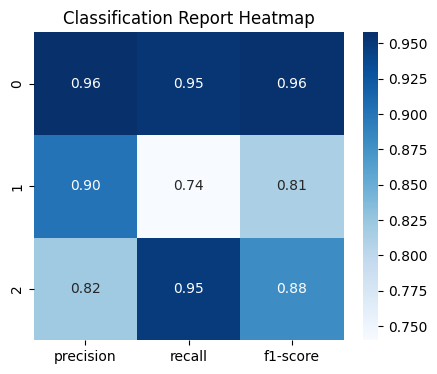


SVM Classification Report with GloVe
Accuracy of One vs One Polynomial Kernel:  80.03 %
              precision    recall  f1-score   support

           0       0.78      0.76      0.77      1075
           1       0.80      0.72      0.76       895
           2       0.83      0.91      0.87      1019

    accuracy                           0.80      2989
   macro avg       0.80      0.80      0.80      2989
weighted avg       0.80      0.80      0.80      2989



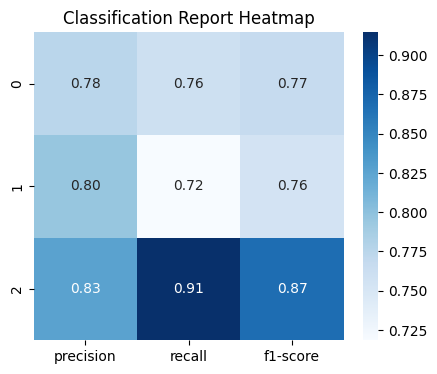


SVM Classification Report with Word2Vec
Accuracy of One vs One Polynomial Kernel:  46.84 %
              precision    recall  f1-score   support

           0       0.44      0.32      0.37      1075
           1       0.64      0.15      0.24       895
           2       0.46      0.91      0.61      1019

    accuracy                           0.47      2989
   macro avg       0.51      0.46      0.41      2989
weighted avg       0.51      0.47      0.41      2989



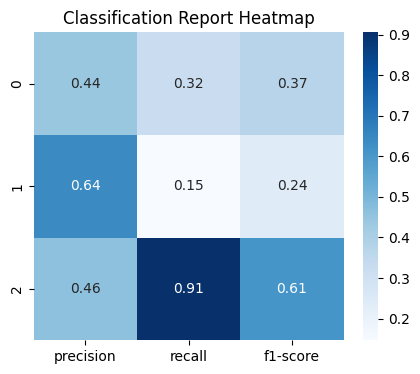

In [ ]:
print("Poly Kernel")
print("\nSVM Classification Report with BoW")
svm_classifier(X_train_bow, X_test_bow, y_train, y_test, 'ovr', 'poly', 1)
print("\nSVM Classification Report with TF-IDF")
svm_classifier(X_train_tfidf, X_test_tfidf, y_train, y_test, 'ovr', 'poly', 1)
print("\nSVM Classification Report with GloVe")
svm_classifier(X_train_glove, X_test_glove, y_train_glove, y_test_glove, 'ovr', 'poly', 1)
print("\nSVM Classification Report with Word2Vec")
svm_classifier(X_train_w2v, X_test_w2v, y_train_w2v, y_test_w2v, 'ovr', 'poly', 1)

### RBF Kernel

RBF Kernel

SVM Classification Report with BoW
Accuracy of One vs One Polynomial Kernel:  88.37 %
              precision    recall  f1-score   support

           0       0.87      0.90      0.89       858
           1       0.89      0.77      0.83       700
           2       0.89      0.96      0.92       833

    accuracy                           0.88      2391
   macro avg       0.88      0.88      0.88      2391
weighted avg       0.88      0.88      0.88      2391



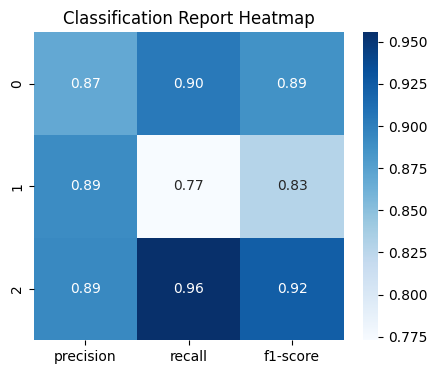




SVM Classification Report with TF-IDF
Accuracy of One vs One Polynomial Kernel:  90.59 %
              precision    recall  f1-score   support

           0       0.89      0.94      0.92       858
           1       0.91      0.80      0.85       700
           2       0.92      0.95      0.93       833

    accuracy                           0.91      2391
   macro avg       0.91      0.90      0.90      2391
weighted avg       0.91      0.91      0.90      2391



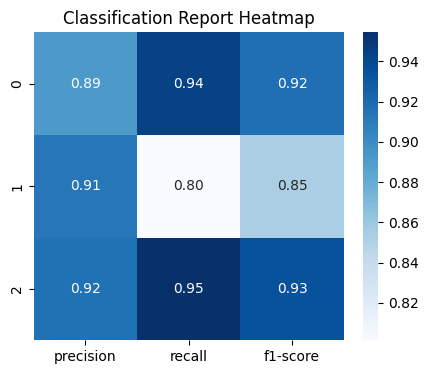




SVM Classification Report with GloVe
Accuracy of One vs One Polynomial Kernel:  80.50 %
              precision    recall  f1-score   support

           0       0.80      0.75      0.77      1075
           1       0.78      0.76      0.77       895
           2       0.83      0.91      0.87      1019

    accuracy                           0.80      2989
   macro avg       0.80      0.80      0.80      2989
weighted avg       0.80      0.80      0.80      2989



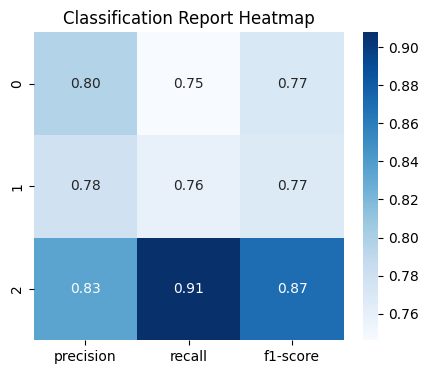




SVM Classification Report with Word2Vec
Accuracy of One vs One Polynomial Kernel:  46.91 %
              precision    recall  f1-score   support

           0       0.41      0.49      0.44      1075
           1       0.51      0.31      0.38       895
           2       0.52      0.59      0.55      1019

    accuracy                           0.47      2989
   macro avg       0.48      0.46      0.46      2989
weighted avg       0.48      0.47      0.46      2989



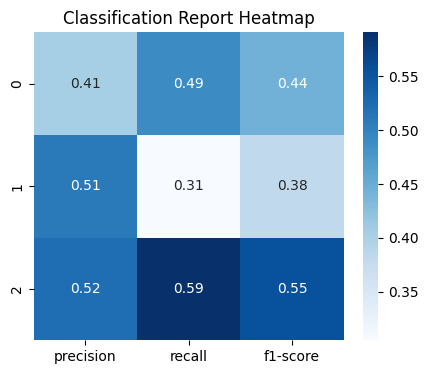

In [ ]:
print("RBF Kernel")
print("\nSVM Classification Report with BoW")
svm_classifier(X_train_bow, X_test_bow, y_train, y_test, 'ovr', 'rbf', 1)
print("\n\n\nSVM Classification Report with TF-IDF")
svm_classifier(X_train_tfidf, X_test_tfidf, y_train, y_test, 'ovr', 'rbf', 1)
print("\n\n\nSVM Classification Report with GloVe")
svm_classifier(X_train_glove, X_test_glove, y_train_glove, y_test_glove, 'ovr', 'rbf', 1)
print("\n\n\nSVM Classification Report with Word2Vec")
svm_classifier(X_train_w2v, X_test_w2v, y_train_w2v, y_test_w2v, 'ovr', 'rbf', 1)

### Sigmoid Kernel

RBF Kernel

SVM Classification Report with BoW
Accuracy of One vs One Polynomial Kernel:  81.18 %
              precision    recall  f1-score   support

           0       0.80      0.76      0.78       858
           1       0.76      0.73      0.75       700
           2       0.86      0.93      0.90       833

    accuracy                           0.81      2391
   macro avg       0.81      0.81      0.81      2391
weighted avg       0.81      0.81      0.81      2391



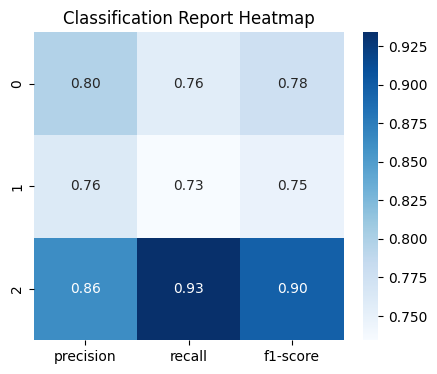


SVM Classification Report with TF-IDF
Accuracy of One vs One Polynomial Kernel:  84.23 %
              precision    recall  f1-score   support

           0       0.82      0.82      0.82       858
           1       0.82      0.75      0.78       700
           2       0.89      0.94      0.91       833

    accuracy                           0.84      2391
   macro avg       0.84      0.84      0.84      2391
weighted avg       0.84      0.84      0.84      2391



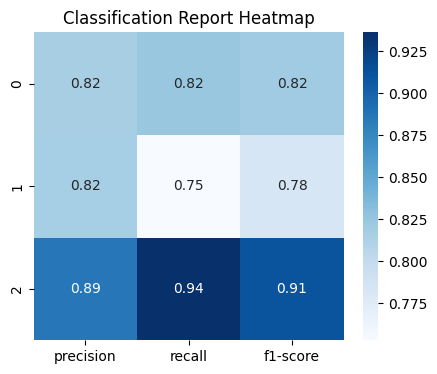


SVM Classification Report with GloVe
Accuracy of One vs One Polynomial Kernel:  61.06 %
              precision    recall  f1-score   support

           0       0.53      0.60      0.56      1075
           1       0.54      0.55      0.54       895
           2       0.81      0.68      0.74      1019

    accuracy                           0.61      2989
   macro avg       0.62      0.61      0.61      2989
weighted avg       0.63      0.61      0.62      2989



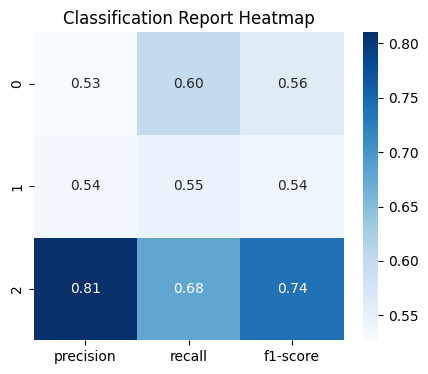


SVM Classification Report with Word2Vec
Accuracy of One vs One Polynomial Kernel:  34.16 %
              precision    recall  f1-score   support

           0       0.39      0.50      0.44      1075
           1       0.26      0.40      0.31       895
           2       0.60      0.13      0.21      1019

    accuracy                           0.34      2989
   macro avg       0.41      0.34      0.32      2989
weighted avg       0.42      0.34      0.32      2989



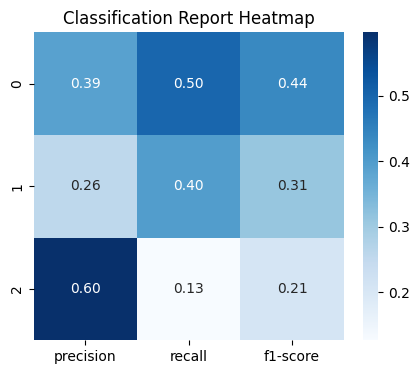

In [ ]:
print("RBF Kernel")
print("\nSVM Classification Report with BoW")
svm_classifier(X_train_bow, X_test_bow, y_train, y_test, 'ovr', 'sigmoid', 1)
print("\nSVM Classification Report with TF-IDF")
svm_classifier(X_train_tfidf, X_test_tfidf, y_train, y_test, 'ovr', 'sigmoid', 1)
print("\nSVM Classification Report with GloVe")
svm_classifier(X_train_glove, X_test_glove, y_train_glove, y_test_glove, 'ovr', 'sigmoid', 1)
print("\nSVM Classification Report with Word2Vec")
svm_classifier(X_train_w2v, X_test_w2v, y_train_w2v, y_test_w2v, 'ovr', 'sigmoid', 1)

## RandomizedSearchCV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn import svm

# Parameter grid for randomized search
param_dist = {
    'C': [0.1, 1, 10],
    'degree': [2, 3, 4],
    'gamma': ['scale', 'auto'],
}

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(svm.SVC(decision_function_shape='ovo', kernel='rbf'), param_distributions=param_dist, n_iter=10, cv=5, random_state=42)
random_search.fit(X_train_bow, y_train)

# Best model after randomized search
best_random_model = random_search.best_estimator_
random_search.best_params_

{'gamma': 'scale', 'degree': 4, 'C': 10}

In [ ]:
print(best_random_model)

SVC(C=10, decision_function_shape='ovo', degree=4)


In [ ]:
def best_svm_classifier(X_train, X_test, y_train, y_test, best_params):
  svm_model = svm.SVC(decision_function_shape='ovo', kernel='rbf', **best_params)
  svm_model.fit(X_train, y_train)
  y_pred = svm_model.predict(X_test)
  svm_acc = accuracy_score(y_test, y_pred)
  svm_f1 = f1_score(y_test, y_pred, average='weighted')
  print('Accuracy of One vs One Polynomial Kernel: ', "%.2f" % (svm_acc * 100), "%")
  print(classification_report(y_test, y_pred))
  plot_heatmap(y_test, y_pred)

SVM Classification with best parameters

SVM Classification Report with BoW: 
Accuracy of One vs One Polynomial Kernel:  91.64 %
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       858
           1       0.94      0.81      0.87       700
           2       0.93      0.95      0.94       833

    accuracy                           0.92      2391
   macro avg       0.92      0.91      0.91      2391
weighted avg       0.92      0.92      0.92      2391



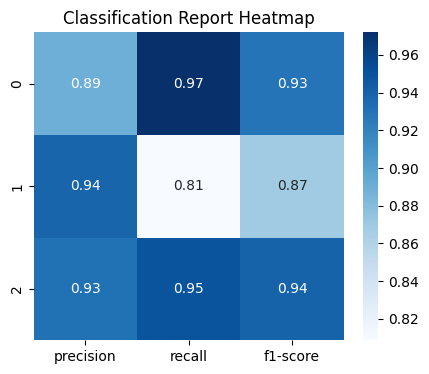




SVM Classification Report with TF-IDF: 
Accuracy of One vs One Polynomial Kernel:  91.80 %
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       858
           1       0.93      0.81      0.87       700
           2       0.92      0.96      0.94       833

    accuracy                           0.92      2391
   macro avg       0.92      0.91      0.91      2391
weighted avg       0.92      0.92      0.92      2391



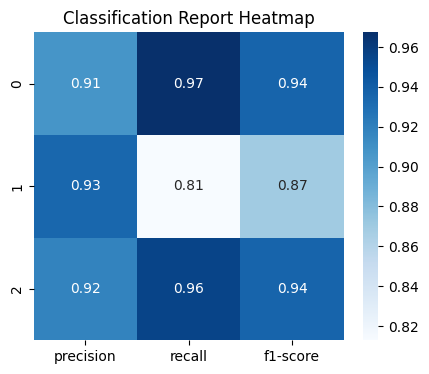




SVM Classification Report with GloVe: 
Accuracy of One vs One Polynomial Kernel:  84.34 %
              precision    recall  f1-score   support

           0       0.82      0.86      0.84      1075
           1       0.82      0.76      0.79       895
           2       0.89      0.90      0.89      1019

    accuracy                           0.84      2989
   macro avg       0.84      0.84      0.84      2989
weighted avg       0.84      0.84      0.84      2989



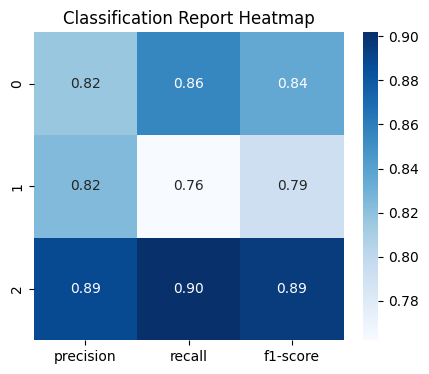




SVM Classification Report with Word2Vec: 
Accuracy of One vs One Polynomial Kernel:  61.02 %
              precision    recall  f1-score   support

           0       0.55      0.43      0.48      1075
           1       0.66      0.53      0.59       895
           2       0.62      0.87      0.72      1019

    accuracy                           0.61      2989
   macro avg       0.61      0.61      0.60      2989
weighted avg       0.61      0.61      0.60      2989



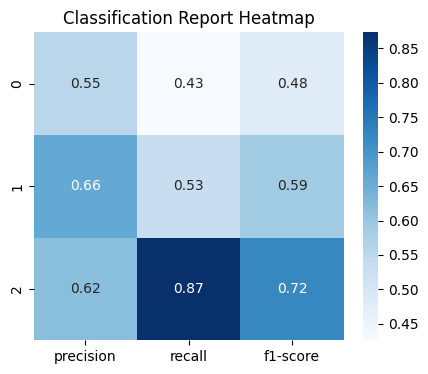

In [ ]:
print("SVM Classification with best parameters")
print("\nSVM Classification Report with BoW: ")
best_svm_classifier(X_train_bow, X_test_bow, y_train, y_test, random_search.best_params_)

print("\n\n\nSVM Classification Report with TF-IDF: ")
best_svm_classifier(X_train_tfidf, X_test_tfidf, y_train, y_test, random_search.best_params_)

print("\n\n\nSVM Classification Report with GloVe: ")
best_svm_classifier(X_train_glove, X_test_glove, y_train_glove, y_test_glove, random_search.best_params_)

print("\n\n\nSVM Classification Report with Word2Vec: ")
best_svm_classifier(X_train_w2v, X_test_w2v, y_train_w2v, y_test_w2v, random_search.best_params_)

# Gradient Boosting Tree

We use early stopping: Stop training if no improvement after 5 iterations

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns

In [ ]:
def best_gb_classifier(X_train, X_test, y_train, y_test, n_estimators=100,learning_rate = 0.1, max_depth = None):
  gb_model = GradientBoostingClassifier(random_state=42, n_iter_no_change=5, validation_fraction=0.1, n_estimators=n_estimators, learning_rate = learning_rate, max_depth=max_depth)
  gb_model.fit(X_train, y_train)
  y_pred_gb = gb_model.predict(X_test)
  gb_acc = accuracy_score(y_test, y_pred_gb)
  gb_f1 = f1_score(y_test, y_pred_gb, average='weighted')
  print('Accuracy: ', "%.2f" % (gb_acc * 100), "%")
  print(classification_report(y_test, y_pred_gb))
  plot_heatmap(y_test, y_pred_gb)

After hyperparameter tuning
Gradient Boosting Classification Report with BoW:
Accuracy:  88.50 %
              precision    recall  f1-score   support

           0       0.82      0.98      0.89       858
           1       0.93      0.74      0.82       700
           2       0.93      0.91      0.92       833

    accuracy                           0.88      2391
   macro avg       0.89      0.88      0.88      2391
weighted avg       0.89      0.88      0.88      2391



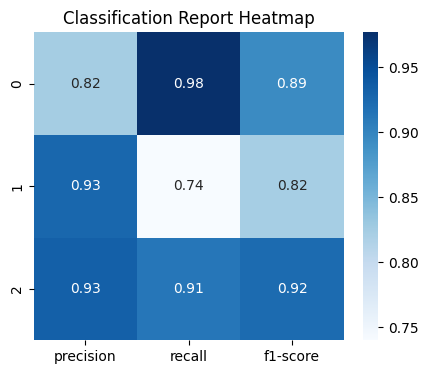

Gradient Boosting Classification Report with TF-IDF:
Accuracy:  88.62 %
              precision    recall  f1-score   support

           0       0.84      0.97      0.90       858
           1       0.92      0.76      0.83       700
           2       0.92      0.91      0.92       833

    accuracy                           0.89      2391
   macro avg       0.89      0.88      0.88      2391
weighted avg       0.89      0.89      0.88      2391



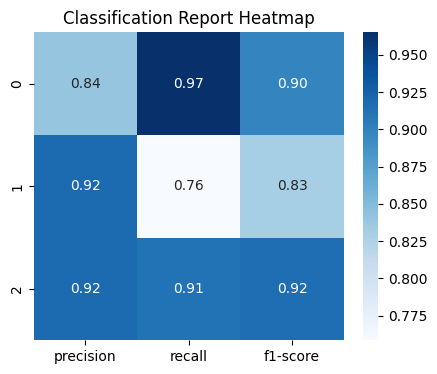

Gradient Boosting Classification Report with GloVe:
Accuracy:  78.99 %
              precision    recall  f1-score   support

           0       0.76      0.93      0.84      1075
           1       0.81      0.62      0.71       895
           2       0.81      0.79      0.80      1019

    accuracy                           0.79      2989
   macro avg       0.79      0.78      0.78      2989
weighted avg       0.79      0.79      0.79      2989



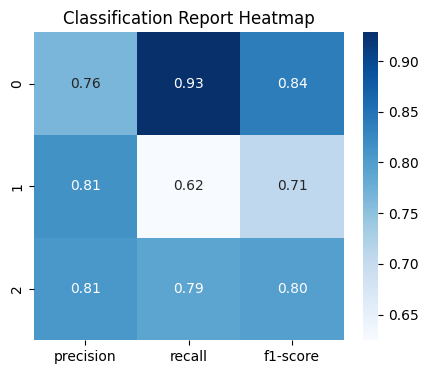

Gradient Boosting Classification Report with Word2Vec:
Accuracy:  74.71 %
              precision    recall  f1-score   support

           0       0.68      0.93      0.78      1075
           1       0.81      0.58      0.68       895
           2       0.82      0.70      0.75      1019

    accuracy                           0.75      2989
   macro avg       0.77      0.74      0.74      2989
weighted avg       0.77      0.75      0.74      2989



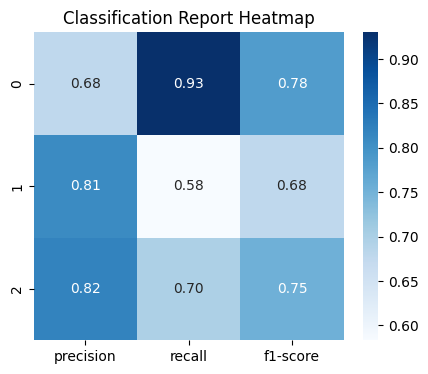

In [ ]:
print("After hyperparameter tuning")
print("Gradient Boosting Classification Report with BoW:")
best_gb_classifier(X_train_bow, X_test_bow, y_train, y_test, n_estimators=100)
print("Gradient Boosting Classification Report with TF-IDF:")
best_gb_classifier(X_train_tfidf, X_test_tfidf, y_train, y_test, n_estimators=100)
print("Gradient Boosting Classification Report with GloVe:")
best_gb_classifier(X_train_glove, X_test_glove, y_train_glove, y_test_glove, n_estimators=100)
print("Gradient Boosting Classification Report with Word2Vec:")
best_gb_classifier(X_train_w2v, X_test_w2v, y_train_w2v, y_test_w2v, n_estimators=100)

### Trying different n_estimators with TF_IDF dataset

n_estimators = 200
Accuracy:  88.62 %
              precision    recall  f1-score   support

           0       0.84      0.97      0.90       858
           1       0.92      0.76      0.83       700
           2       0.92      0.91      0.92       833

    accuracy                           0.89      2391
   macro avg       0.89      0.88      0.88      2391
weighted avg       0.89      0.89      0.88      2391



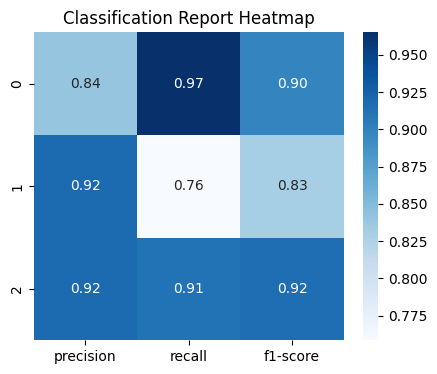

n_estimators = 300
Accuracy:  88.62 %
              precision    recall  f1-score   support

           0       0.84      0.97      0.90       858
           1       0.92      0.76      0.83       700
           2       0.92      0.91      0.92       833

    accuracy                           0.89      2391
   macro avg       0.89      0.88      0.88      2391
weighted avg       0.89      0.89      0.88      2391



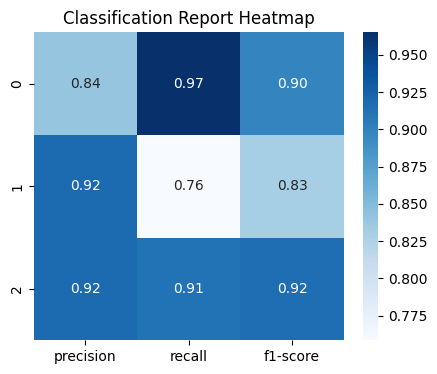

n_estimators = 400
Accuracy:  88.62 %
              precision    recall  f1-score   support

           0       0.84      0.97      0.90       858
           1       0.92      0.76      0.83       700
           2       0.92      0.91      0.92       833

    accuracy                           0.89      2391
   macro avg       0.89      0.88      0.88      2391
weighted avg       0.89      0.89      0.88      2391



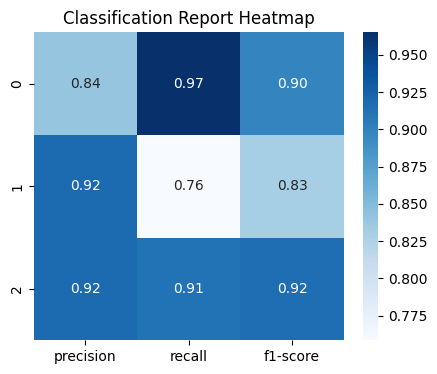

n_estimators = 500
Accuracy:  88.62 %
              precision    recall  f1-score   support

           0       0.84      0.97      0.90       858
           1       0.92      0.76      0.83       700
           2       0.92      0.91      0.92       833

    accuracy                           0.89      2391
   macro avg       0.89      0.88      0.88      2391
weighted avg       0.89      0.89      0.88      2391



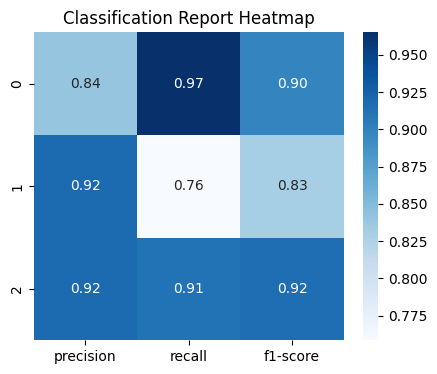

In [ ]:
print("n_estimators = 200")
best_gb_classifier(X_train_tfidf, X_test_tfidf, y_train, y_test, n_estimators=200)
print("n_estimators = 300")
best_gb_classifier(X_train_tfidf, X_test_tfidf, y_train, y_test, n_estimators=300)
print("n_estimators = 400")
best_gb_classifier(X_train_tfidf, X_test_tfidf, y_train, y_test, n_estimators=400)
print("n_estimators = 500")
best_gb_classifier(X_train_tfidf, X_test_tfidf, y_train, y_test, n_estimators=500)

### Trying different learning rates

learning_rate = 0.01
Accuracy:  88.46 %
              precision    recall  f1-score   support

           0       0.84      0.97      0.90       858
           1       0.92      0.76      0.83       700
           2       0.92      0.91      0.91       833

    accuracy                           0.88      2391
   macro avg       0.89      0.88      0.88      2391
weighted avg       0.89      0.88      0.88      2391



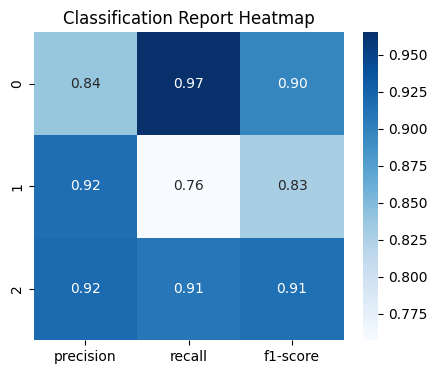




learning_rate = 0.05
Accuracy:  88.75 %
              precision    recall  f1-score   support

           0       0.84      0.97      0.90       858
           1       0.92      0.76      0.83       700
           2       0.92      0.91      0.92       833

    accuracy                           0.89      2391
   macro avg       0.89      0.88      0.88      2391
weighted avg       0.89      0.89      0.89      2391



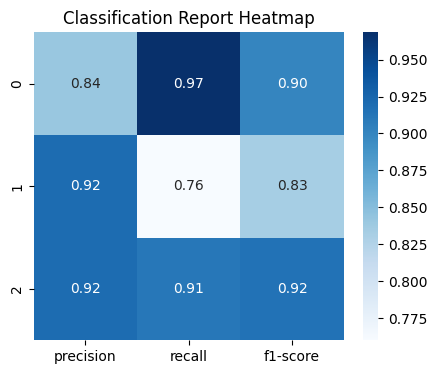




learning_rate = 0.1
Accuracy:  88.62 %
              precision    recall  f1-score   support

           0       0.84      0.97      0.90       858
           1       0.92      0.76      0.83       700
           2       0.92      0.91      0.92       833

    accuracy                           0.89      2391
   macro avg       0.89      0.88      0.88      2391
weighted avg       0.89      0.89      0.88      2391



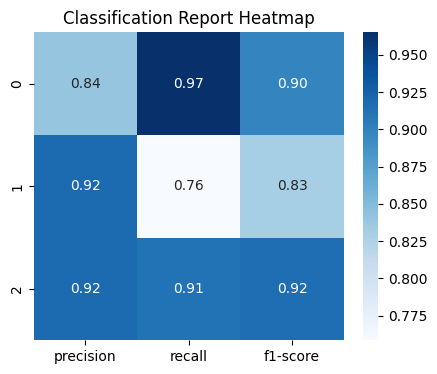




learning_rate = 0.2
Accuracy:  88.62 %
              precision    recall  f1-score   support

           0       0.84      0.97      0.90       858
           1       0.92      0.76      0.83       700
           2       0.92      0.91      0.91       833

    accuracy                           0.89      2391
   macro avg       0.89      0.88      0.88      2391
weighted avg       0.89      0.89      0.88      2391



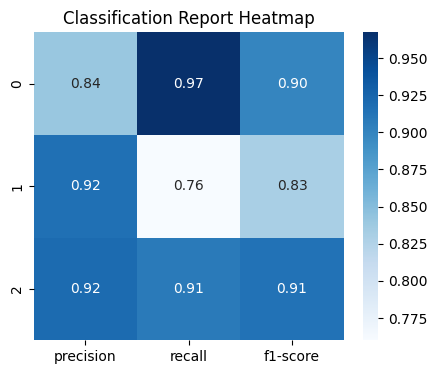

In [ ]:
print("learning_rate = 0.01")
best_gb_classifier(X_train_tfidf, X_test_tfidf, y_train, y_test, n_estimators=500, learning_rate = 0.01)
print("\n\n\nlearning_rate = 0.05")
best_gb_classifier(X_train_tfidf, X_test_tfidf, y_train, y_test, n_estimators=500, learning_rate = 0.05)
print("\n\n\nlearning_rate = 0.1")
best_gb_classifier(X_train_tfidf, X_test_tfidf, y_train, y_test, n_estimators=500, learning_rate = 0.1)
print("\n\n\nlearning_rate = 0.2")
best_gb_classifier(X_train_tfidf, X_test_tfidf, y_train, y_test, n_estimators=500, learning_rate = 0.2)

### Trying different max depth

max_dept = 3
Accuracy:  86.95 %
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       858
           1       0.86      0.76      0.81       700
           2       0.89      0.94      0.91       833

    accuracy                           0.87      2391
   macro avg       0.87      0.86      0.86      2391
weighted avg       0.87      0.87      0.87      2391



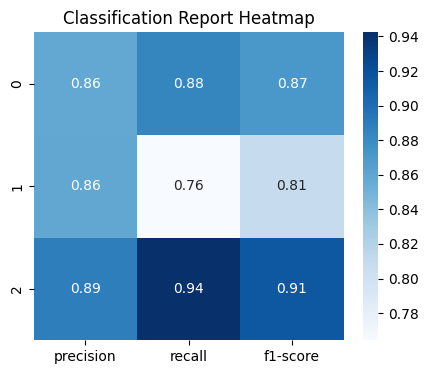

max_dept = 4
Accuracy:  89.59 %
              precision    recall  f1-score   support

           0       0.88      0.95      0.91       858
           1       0.92      0.78      0.84       700
           2       0.90      0.94      0.92       833

    accuracy                           0.90      2391
   macro avg       0.90      0.89      0.89      2391
weighted avg       0.90      0.90      0.89      2391



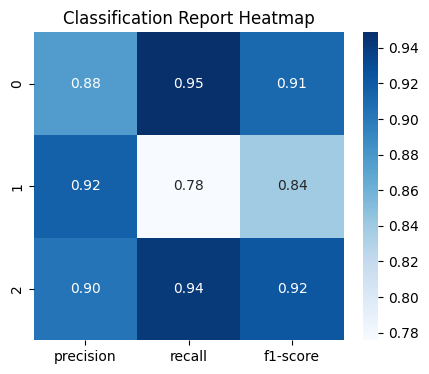

max_dept = 5
Accuracy:  90.00 %
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       858
           1       0.93      0.78      0.84       700
           2       0.91      0.94      0.93       833

    accuracy                           0.90      2391
   macro avg       0.90      0.89      0.90      2391
weighted avg       0.90      0.90      0.90      2391



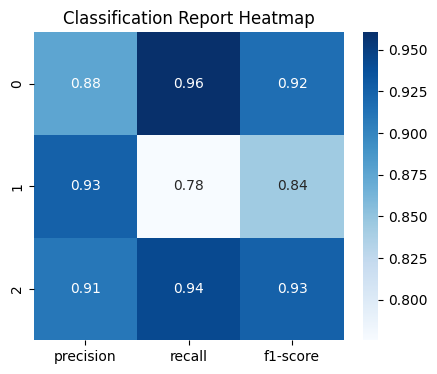

max_dept = 6
Accuracy:  88.00 %
              precision    recall  f1-score   support

           0       0.87      0.90      0.88       858
           1       0.88      0.77      0.82       700
           2       0.89      0.95      0.92       833

    accuracy                           0.88      2391
   macro avg       0.88      0.87      0.88      2391
weighted avg       0.88      0.88      0.88      2391



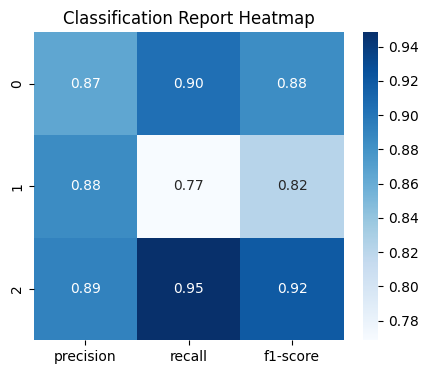

max_dept = 7
Accuracy:  90.46 %
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       858
           1       0.94      0.78      0.85       700
           2       0.91      0.95      0.93       833

    accuracy                           0.90      2391
   macro avg       0.91      0.90      0.90      2391
weighted avg       0.91      0.90      0.90      2391



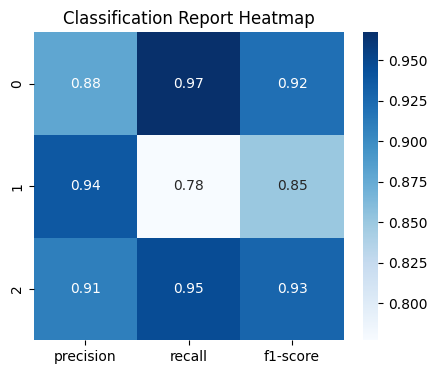

In [ ]:
print("max_dept = 3")
best_gb_classifier(X_train_tfidf, X_test_tfidf, y_train, y_test, n_estimators=500, learning_rate = 0.2, max_depth = 3)
print("max_dept = 4")
best_gb_classifier(X_train_tfidf, X_test_tfidf, y_train, y_test, n_estimators=500, learning_rate = 0.2, max_depth = 4)
print("max_dept = 5")
best_gb_classifier(X_train_tfidf, X_test_tfidf, y_train, y_test, n_estimators=500, learning_rate = 0.2, max_depth = 5)
print("max_dept = 6")
best_gb_classifier(X_train_tfidf, X_test_tfidf, y_train, y_test, n_estimators=500, learning_rate = 0.2, max_depth = 6)
print("max_dept = 7")
best_gb_classifier(X_train_tfidf, X_test_tfidf, y_train, y_test, n_estimators=500, learning_rate = 0.2, max_depth = 7)

### Final best parameters

Accuracy:  90.46 %
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       858
           1       0.94      0.78      0.85       700
           2       0.91      0.95      0.93       833

    accuracy                           0.90      2391
   macro avg       0.91      0.90      0.90      2391
weighted avg       0.91      0.90      0.90      2391



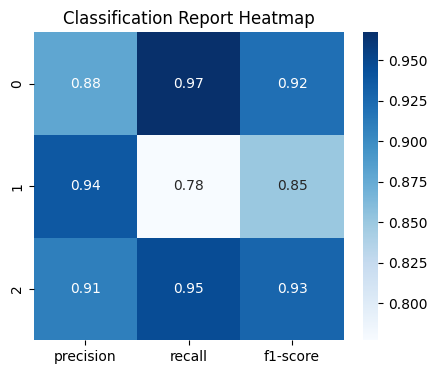

In [ ]:
gb_model = GradientBoostingClassifier(random_state=42, n_iter_no_change=5, validation_fraction=0.1, n_estimators=500, learning_rate =0.2, max_depth=7, min_samples_split = 2)
gb_model.fit(X_train_tfidf, y_train)
y_pred_gb = gb_model.predict(X_test_tfidf)
gb_acc = accuracy_score(y_test, y_pred_gb)
print('Accuracy: ', "%.2f" % (gb_acc * 100), "%")
print(classification_report(y_test, y_pred_gb))
plot_heatmap(y_test, y_pred_gb)

# Neural Networks

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

df = balanced_data
X = df['tweet'].astype(str).values
y = df['class'].values

# Encode the labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Tokenizing the text
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(X)
X_seq = tokenizer.texts_to_sequences(X)

# Padding the sequences
X_padded = pad_sequences(X_seq, maxlen=100, padding='post', truncating='post')

# Splitting the data
X_train_nn, X_test_nn, y_train_nn, y_test_nn = train_test_split(X_padded, y, test_size=0.2, random_state=42)

model = Sequential([
    Embedding(input_dim=10000, output_dim=64, input_length=100),  # Embedding layer
    Flatten(),  # Flatten the output of the embedding layer
    Dense(128, activation='relu'),  # Dense hidden layer
    Dropout(0.2),  # Dropout for regularization
    Dense(64, activation='relu'),  # Another Dense hidden layer
    Dropout(0.2),  # Dropout for regularization
    Dense(3, activation='softmax')  # Output layer for 3 classes (hate speech, offensive, neither)
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
# Train the model
history = model.fit(X_train_nn, y_train_nn,
                    epochs=20,
                    batch_size=32,
                    validation_split=0.2)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_nn, y_test_nn)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Generate classification report
y_pred = np.argmax(model.predict(X_test_nn), axis=1)
print("Classification Report:")
print(classification_report(y_test_nn, y_pred))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - accuracy: 0.5609 - loss: 0.8911 - val_accuracy: 0.8735 - val_loss: 0.3156
Epoch 2/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.9191 - loss: 0.2311 - val_accuracy: 0.9122 - val_loss: 0.2467
Epoch 3/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - accuracy: 0.9707 - loss: 0.0948 - val_accuracy: 0.9143 - val_loss: 0.2666
Epoch 4/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.9913 - loss: 0.0326 - val_accuracy: 0.9190 - val_loss: 0.3409
Epoch 5/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.9965 - loss: 0.0155 - val_accuracy: 0.9153 - val_loss: 0.3564
Epoch 6/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step - accuracy: 0.9966 - loss: 0.0130 - val_accuracy: 0.9054 - val_loss: 0.4592
Epoch 7/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.9973 - loss: 0.0100 - val_accuracy: 0.9033 - val_loss: 0.4518
Epoch 8/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.9984 - loss: 0.0083 - val_accu

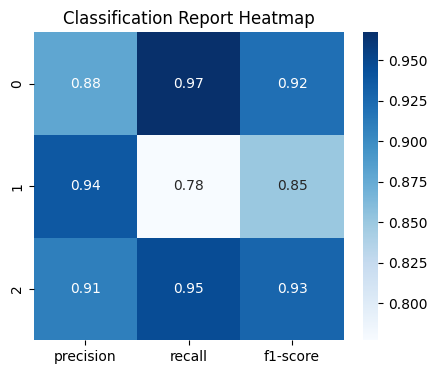

In [ ]:
plot_heatmap(y_test, y_pred_gb)